# Homework - Principal Components Analysis

## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import yaml
from matplotlib import cm 
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, LabelEncoder   
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples


## 0. Preparation (Setting the Random State):

In [2]:
pellegrino = 331438
mungaicoppolino = 246120
rs = min(pellegrino, mungaicoppolino)
np.random.seed(rs)
initial_random_state = np.random.get_state()
np.random.set_state(initial_random_state)

## 1. Loading and Preparing the Data

### 1.1 Storing the csv file in a DataFrame Variable

We store in the variable df_tot the dataframe obtained from the csv file.


In [3]:
df_tot = pd.read_csv("cla4lsp_customers.csv", sep='\t')
df_tot.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


### 1.2 Sub-DFs Creation

Creation of the sub dataframes *workdf*: 2/3 of the rows are taken from the original dataframes df_tot

In [4]:
workdf = df_tot.sample(frac=2/3, random_state=rs)
workdf.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
762,6406,1988,Master,Married,78285.0,0,0,28-10-2013,13,647,...,3,0,0,0,0,0,0,3,11,0
2206,1092,1980,Graduation,Married,61014.0,0,1,11-08-2012,17,269,...,7,0,0,0,0,0,0,3,11,0
419,8581,1971,Master,Married,49505.0,1,1,05-03-2013,4,604,...,8,0,0,0,0,0,0,3,11,0
1370,5948,1975,Graduation,Single,57338.0,0,1,29-04-2014,96,143,...,5,0,0,0,0,0,0,3,11,0
1775,8910,1955,Graduation,Together,42586.0,1,1,29-10-2012,7,194,...,8,0,0,0,0,0,0,3,11,1


### 1.3 Labels and Features

Discarding the ID, Z_CostContact and Z_Revenue columns

In [5]:
labels = ['NumDealsPurchases',
'AcceptedCmp1',
'AcceptedCmp2',
'AcceptedCmp3',
'AcceptedCmp4',
'AcceptedCmp5',
'Response',
'Complain',
'Recency'] #len(labels) == 9

features = [
    'Year_Birth',
    'Education',
    'Marital_Status',
    'Income',
    'Kidhome',
    'Teenhome',
    'Dt_Customer',
    'MntWines', 
    'MntFruits', 
    'MntMeatProducts',
    'MntFishProducts',
    'MntSweetProducts', 
    'MntGoldProds', 
    'NumWebPurchases', 
    'NumCatalogPurchases',
    'NumStorePurchases',
    'NumWebVisitsMonth'
] #len(features) == 17 
workdf = workdf.loc[:, labels + features]
workdf.head()


,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain,Recency,Year_Birth,...,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
762,1,0,0,0,0,0,0,0,13,1988,...,647,107,391,175,67,40,6,4,10,3
2206,4,0,0,0,0,0,0,0,17,1980,...,269,129,495,182,43,29,9,3,4,7
419,9,0,0,0,0,0,0,0,4,1971,...,604,0,100,19,0,28,10,2,8,8
1370,2,0,0,0,0,0,0,0,96,1975,...,143,6,52,11,8,17,4,1,5,5
1775,5,0,0,0,0,0,1,0,7,1955,...,194,2,56,0,0,0,4,1,6,8


In [6]:
column = workdf['AcceptedCmp1'] + workdf['AcceptedCmp2']
display(column.unique())


array([0, 1, 2], dtype=int64)

### 1.4 Removing randomly from workdf one feature

In [7]:
purchase_features = ['MntWines', 
                    'MntFruits', 
                    'MntMeatProducts',
                    'MntFishProducts',
                    'MntSweetProducts', 
                    'MntGoldProds', 
                    'NumWebPurchases', 
                    'NumCatalogPurchases',
                    'NumStorePurchases']

removed_feature = np.random.choice(purchase_features)
workdf = workdf.drop(columns=removed_feature)
features.remove(removed_feature)
print(f"Feature removed: {removed_feature}\nFirst elements of the workdf Dataframes:")
display(workdf.head())



Feature removed: NumStorePurchases
First elements of the workdf Dataframes:


,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain,Recency,Year_Birth,...,Dt_Customer,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumWebVisitsMonth
762,1,0,0,0,0,0,0,0,13,1988,...,28-10-2013,647,107,391,175,67,40,6,4,3
2206,4,0,0,0,0,0,0,0,17,1980,...,11-08-2012,269,129,495,182,43,29,9,3,7
419,9,0,0,0,0,0,0,0,4,1971,...,05-03-2013,604,0,100,19,0,28,10,2,8
1370,2,0,0,0,0,0,0,0,96,1975,...,29-04-2014,143,6,52,11,8,17,4,1,5
1775,5,0,0,0,0,0,1,0,7,1955,...,29-10-2012,194,2,56,0,0,0,4,1,8


### 1.5 Clean the dataset workdf

NaN value were found in the column *'Income'*. For sake of simplicity, rows with NaN value in that column are suppressed.

In [8]:
tmp_df = workdf.loc[:, features]
df_nan = tmp_df[tmp_df.isna().any(axis=1)]
print("Dataframes where there are NaN values (df_nan):\n")
display(df_nan)
workdf = workdf.dropna()
print("workdf without df_nan:\n")
display(workdf)

Dataframes where there are NaN values (df_nan):



,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumWebVisitsMonth
58,1982,Graduation,Single,NaN,1,0,17-06-2013,11,3,22,2,2,6,2,0,6
1382,1958,Graduation,Together,NaN,1,1,03-09-2012,19,4,12,2,2,6,1,0,5
71,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,3,43,17,4,17,3,0,8
90,1957,PhD,Married,NaN,2,1,19-11-2012,230,42,192,49,37,53,7,2,9
133,1963,Graduation,Married,NaN,0,1,11-08-2013,231,65,196,38,71,124,6,5,4
1386,1972,PhD,Together,NaN,1,0,02-03-2014,25,1,13,0,0,3,1,0,7
312,1989,Graduation,Married,NaN,0,0,03-06-2013,861,138,461,60,30,61,6,5,3
2061,1981,PhD,Single,NaN,1,0,31-05-2013,23,0,15,0,2,7,3,0,6
10,1983,Graduation,Married,NaN,1,0,15-11-2013,5,5,6,0,2,1,1,0,7
48,1951,Graduation,Single,NaN,2,1,01-01-2014,48,5,48,6,10,7,2,1,6


workdf without df_nan:



,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain,Recency,Year_Birth,...,Dt_Customer,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumWebVisitsMonth
762,1,0,0,0,0,0,0,0,13,1988,...,28-10-2013,647,107,391,175,67,40,6,4,3
2206,4,0,0,0,0,0,0,0,17,1980,...,11-08-2012,269,129,495,182,43,29,9,3,7
419,9,0,0,0,0,0,0,0,4,1971,...,05-03-2013,604,0,100,19,0,28,10,2,8
1370,2,0,0,0,0,0,0,0,96,1975,...,29-04-2014,143,6,52,11,8,17,4,1,5
1775,5,0,0,0,0,0,1,0,7,1955,...,29-10-2012,194,2,56,0,0,0,4,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1732,1,0,0,1,0,0,0,0,90,1955,...,27-04-2013,18,2,10,0,0,25,1,1,7
358,1,0,0,0,0,0,0,1,65,1943,...,20-08-2013,629,17,177,69,0,8,5,3,2
1118,1,0,0,0,0,0,0,0,47,1966,...,16-01-2013,2,23,11,8,6,46,2,1,8
1520,1,0,0,0,0,0,1,0,73,1983,...,03-06-2013,910,111,724,49,74,55,10,2,3


In [9]:
np.unique(workdf['Education'].values)

array(['2n Cycle', 'Basic', 'Graduation', 'Master', 'PhD'], dtype=object)

## 2. Exercise 2 (Encoding of Categorical Data)

In [10]:
tmp_df = workdf[['Education']]
df_nan = tmp_df[tmp_df.isna().any(axis=1)]
display(df_nan)

,Education


In [11]:
education_mapping = {
    'Basic': 1,
    '2n Cycle': 2,
    'Graduation': 3,
    'Master': 4,
    'PhD': 5
}

# Map the 'Education' column using the created dictionary
workdf['Education'] = workdf['Education'].map(education_mapping)
display(workdf['Education'])

762     4
2206    3
419     4
1370    3
1775    3
       ..
1732    3
358     4
1118    1
1520    5
1477    5
Name: Education, Length: 1477, dtype: int64

In [12]:
workdf['Education']

762     4
2206    3
419     4
1370    3
1775    3
       ..
1732    3
358     4
1118    1
1520    5
1477    5
Name: Education, Length: 1477, dtype: int64

In [454]:
tmp_df = workdf[['Education']]
df_nan = tmp_df[tmp_df.isna().any(axis=1)]
display(df_nan)

,Education


In [455]:
np.unique(np.array(workdf['Marital_Status']))

array(['Absurd', 'Alone', 'Divorced', 'Married', 'Single', 'Together',
       'Widow', 'YOLO'], dtype=object)

In [423]:
MaritalStatus_mapping = {
    'Absurd': 1,
    'Alone': 2,
    'Married': 3,
    'Divorced': 4,
    'Single': 5,
    'Together': 6,
    'Widow': 7,
    'YOLO': 8
    
}
# Map the 'Education' column using the created dictionary
workdf['Marital_Status'] = workdf['Marital_Status'].map(MaritalStatus_mapping)
features = [item for item in features if item not in ['Dt_Customer']]


In [424]:
display(workdf['Marital_Status'])

762     3
2206    3
419     3
1370    5
1775    6
       ..
1732    4
358     3
1118    6
1520    5
1477    3
Name: Marital_Status, Length: 1477, dtype: int64

In [555]:
LE = LabelEncoder()
workdf.loc[:, ['Marital_Status']] =  LE.fit_transform(workdf.loc[:, ['Marital_Status']])
display(workdf['Marital_Status'])


c:\Users\marco\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\marco\AppData\Local\Temp\ipykernel_10392\2743325816.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  workdf.loc[:, ['Marital_Status']] =  LE.fit_transform(workdf.loc[:, ['Marital_Status']])


762     3
2206    3
419     3
1370    4
1775    5
       ..
1732    2
358     3
1118    5
1520    4
1477    3
Name: Marital_Status, Length: 1477, dtype: int32

In [13]:
OHE = OneHotEncoder()
transformed = OHE.fit_transform(workdf.loc[:, ['Marital_Status']])
# stiamo aggiungendo delle nuove colonne usando i titoli creati dal transformer e i dati transformati salvati come array
workdf[OHE.get_feature_names_out()] = transformed.toarray()
workdf = workdf.drop(columns=['Marital_Status'])

features = features + list(OHE.get_feature_names_out())

display(workdf)

,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain,Recency,Year_Birth,...,NumCatalogPurchases,NumWebVisitsMonth,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
762,1,0,0,0,0,0,0,0,13,1988,...,4,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2206,4,0,0,0,0,0,0,0,17,1980,...,3,7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
419,9,0,0,0,0,0,0,0,4,1971,...,2,8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1370,2,0,0,0,0,0,0,0,96,1975,...,1,5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1775,5,0,0,0,0,0,1,0,7,1955,...,1,8,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1732,1,0,0,1,0,0,0,0,90,1955,...,1,7,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
358,1,0,0,0,0,0,0,1,65,1943,...,3,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1118,1,0,0,0,0,0,0,0,47,1966,...,1,8,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1520,1,0,0,0,0,0,1,0,73,1983,...,2,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [14]:
split_columns = workdf['Dt_Customer'].str.split('-', expand=True)
workdf['Dt_Customer'] = split_columns[2] + split_columns[1].str.zfill(2) + split_columns[0].str.zfill(2)
workdf['Dt_Customer'] = pd.to_numeric(workdf['Dt_Customer'])
display(workdf['Dt_Customer'])


762     20131028
2206    20120811
419     20130305
1370    20140429
1775    20121029
          ...   
1732    20130427
358     20130820
1118    20130116
1520    20130603
1477    20131102
Name: Dt_Customer, Length: 1477, dtype: int64

Dt_customer is handled differently. Major importance to old data, rescaled from 0 to 600

In [556]:
column_names = ['Dt_Customer_Day', 'Dt_Customer_Month', 'Dt_Customer_Year']

# Split the column into three columns: 'Day', 'Month', 'Year'
workdf[column_names] = workdf['Dt_Customer'].str.split('-', expand=True)


workdf[column_names] = workdf[column_names].astype(int)

workdf = workdf.drop(columns='Dt_Customer')

features = features + column_names
display(workdf.columns)
display(features)


Index(['NumDealsPurchases', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain', 'Recency',
       'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumWebVisitsMonth',
       'Dt_Customer_Day', 'Dt_Customer_Month', 'Dt_Customer_Year'],
      dtype='object')

['Year_Birth',
 'Education',
 'Marital_Status',
 'Income',
 'Kidhome',
 'Teenhome',
 'Dt_Customer',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumWebVisitsMonth',
 'Dt_Customer_Day',
 'Dt_Customer_Month',
 'Dt_Customer_Year']

In [557]:

features = [item for item in features if item not in ['Dt_Customer']]



In [15]:
features = [item for item in features if item not in ['Marital_Status']]

In [374]:
features = [item for item in features if item not in ['Marital_Status', 'Dt_Customer']]


Now Xworkdf

In [17]:
Xworkdf = workdf[features]
#display(Xworkdf)

In [559]:
Xworkdf

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumWebVisitsMonth,Dt_Customer_Day,Dt_Customer_Month,Dt_Customer_Year
762,1988,4,3,78285.0,0,0,647,107,391,175,67,40,6,4,3,28,10,2013
2206,1980,3,3,61014.0,0,1,269,129,495,182,43,29,9,3,7,11,8,2012
419,1971,4,3,49505.0,1,1,604,0,100,19,0,28,10,2,8,5,3,2013
1370,1975,3,4,57338.0,0,1,143,6,52,11,8,17,4,1,5,29,4,2014
1775,1955,3,5,42586.0,1,1,194,2,56,0,0,0,4,1,8,29,10,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1732,1955,3,2,37244.0,1,1,18,2,10,0,0,25,1,1,7,27,4,2013
358,1943,4,3,65073.0,0,0,629,17,177,69,0,8,5,3,2,20,8,2013
1118,1966,1,5,22634.0,0,0,2,23,11,8,6,46,2,1,8,16,1,2013
1520,1983,5,4,87188.0,0,0,910,111,724,49,74,55,10,2,3,3,6,2013


## 3. Exercise 3 (Preprocessing and full-PCA)

Creation of the two DFs *Xworkdf_std* and *Xworksf_mm*, created using a StandardScaler and a MinMaxScaler

In [18]:
STDscaler = StandardScaler()
MMscaler = MinMaxScaler()

Xworkdf_std = STDscaler.fit_transform(Xworkdf)
Xworkdf_mm = MMscaler.fit_transform(Xworkdf)

Xworkdf_std = pd.DataFrame(Xworkdf_std, columns=Xworkdf.columns)
Xworkdf_mm = pd.DataFrame(Xworkdf_mm, columns=Xworkdf.columns)

Below are shown the plots of *Xworkdf*,

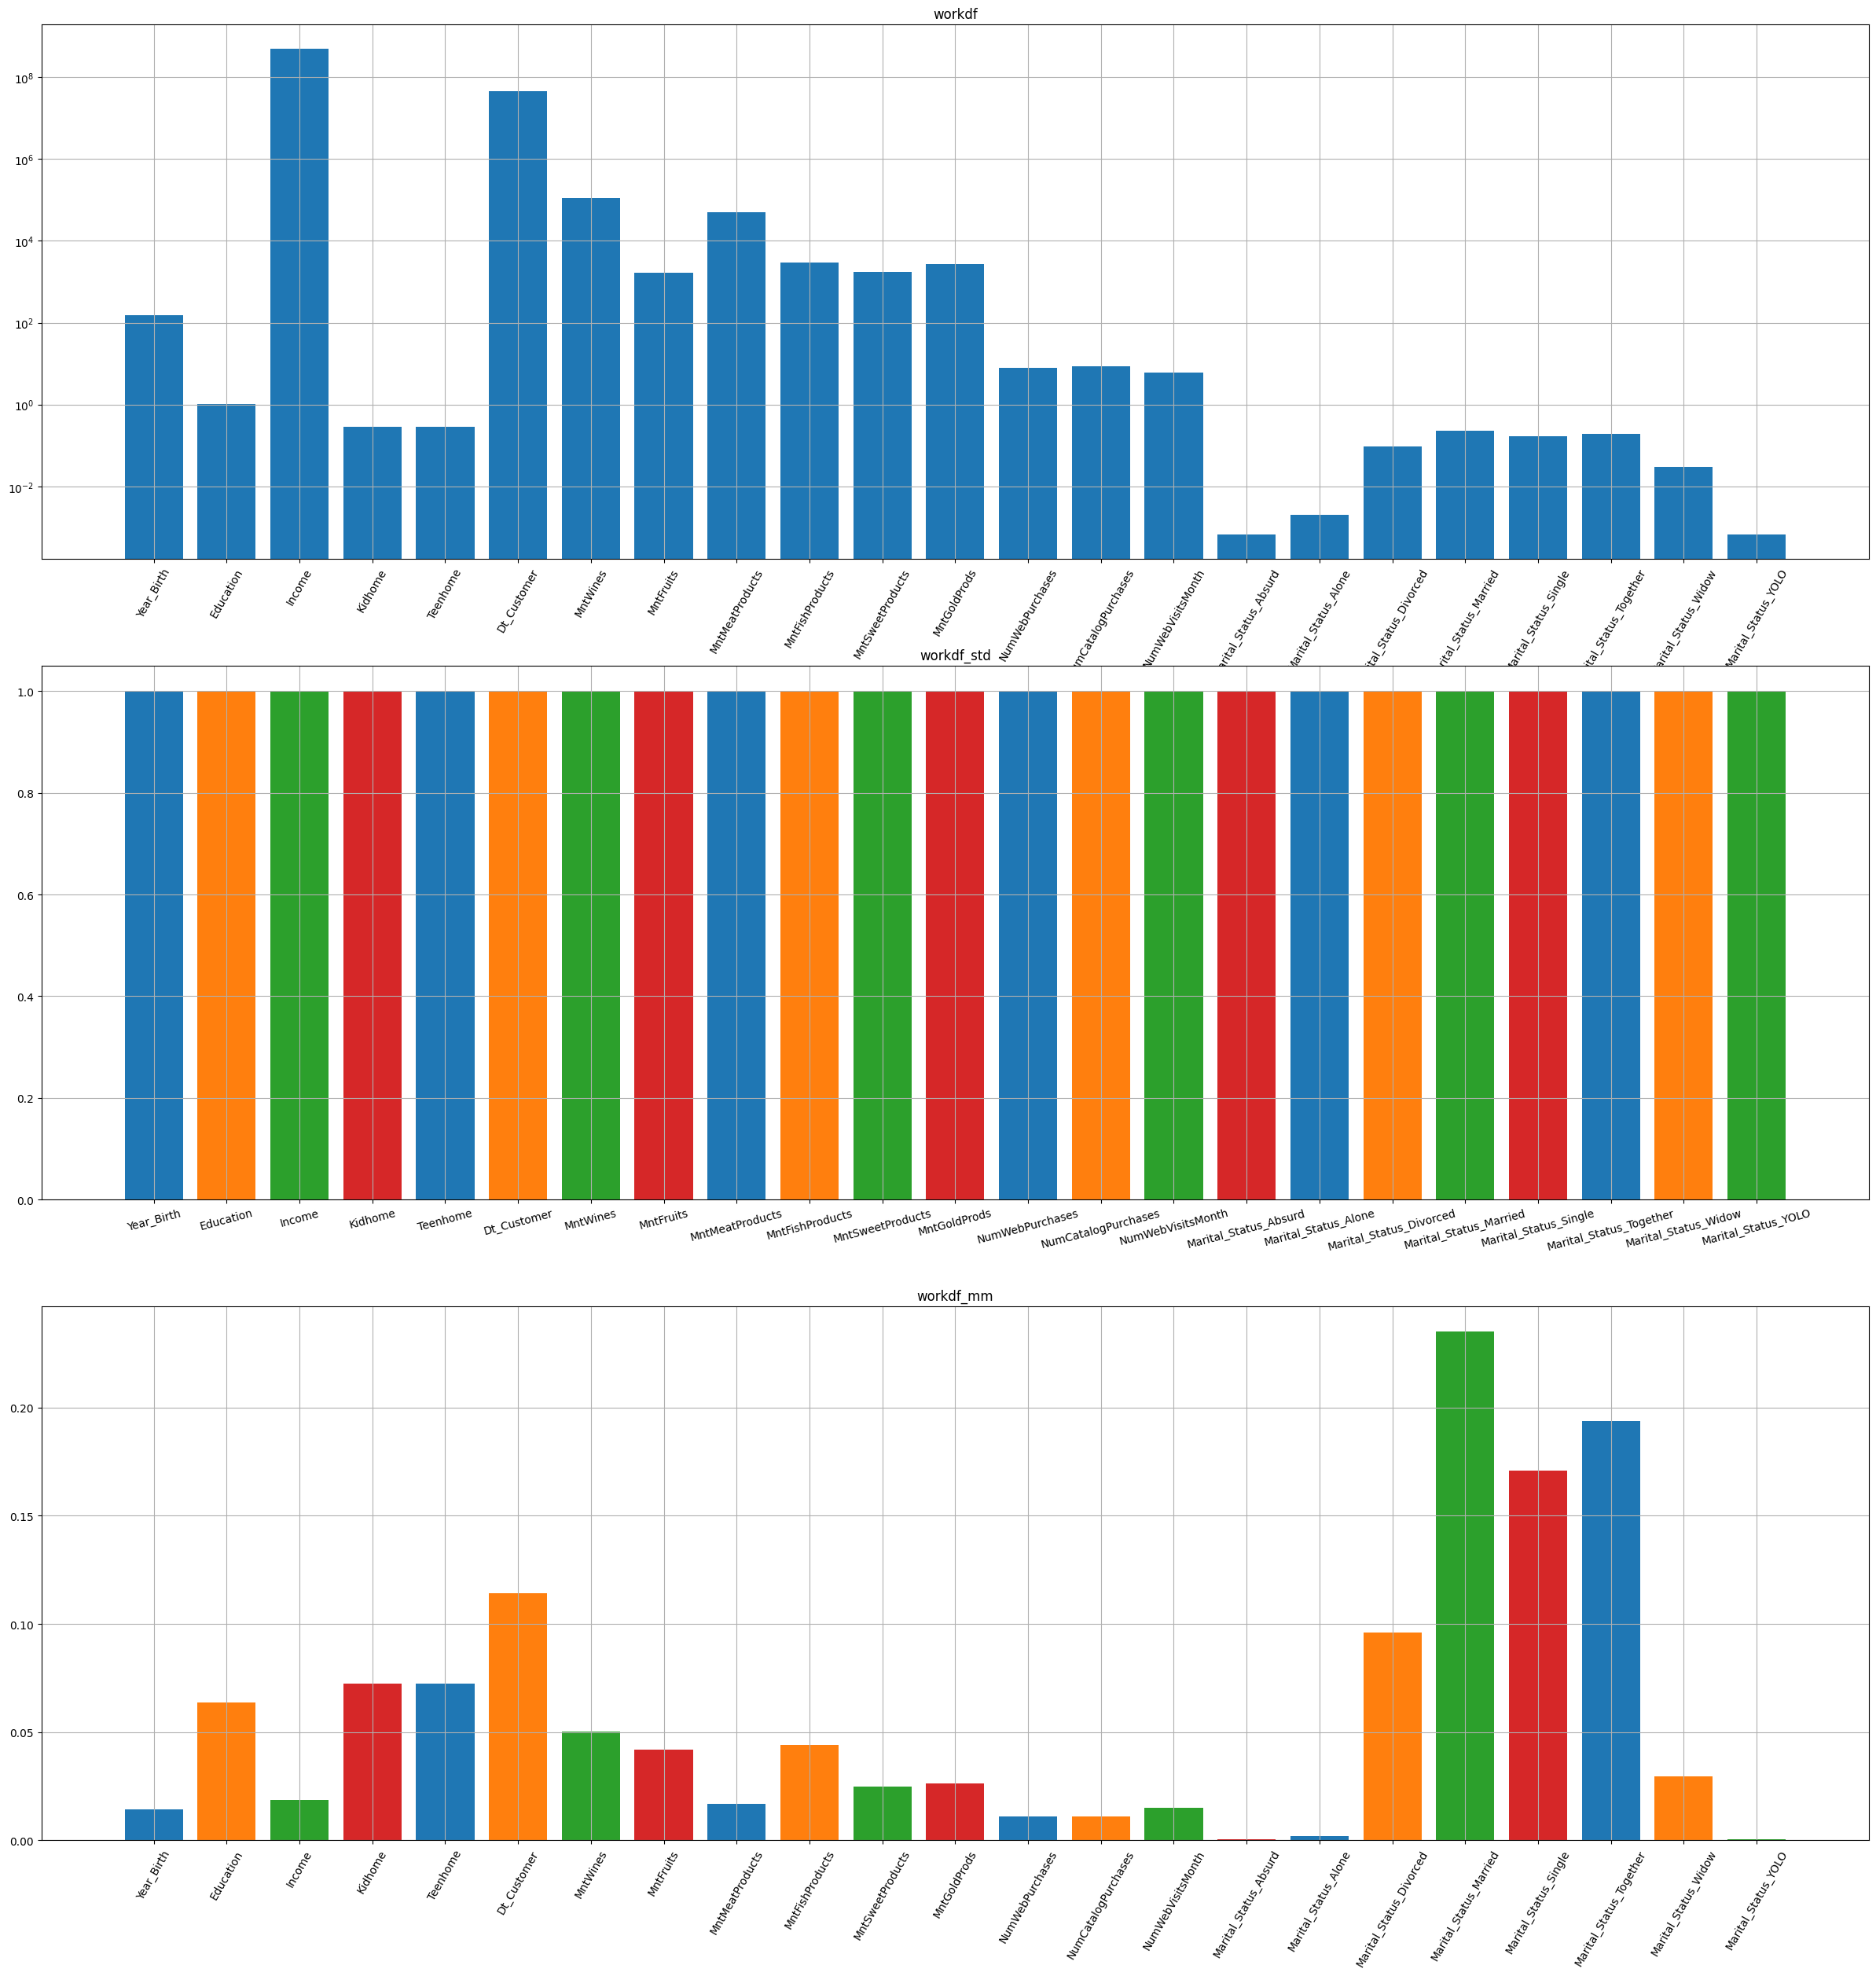

In [19]:
tab10 = cm.tab10.colors

fig, ax = plt.subplots(3, 1, figsize=(30, 30))
ax[0].bar(np.arange(Xworkdf.shape[1]), np.array(Xworkdf.var()))
ax[0].set_xticks(ticks=np.arange(Xworkdf.shape[1]), 
           labels=Xworkdf.columns.to_list(),
           rotation=60)
ax[0].set_title('workdf')
ax[0].set_yscale('log')
ax[0].grid(visible=True, which='both')

ax[1].bar(np.arange(Xworkdf.shape[1]), Xworkdf_std.var(), color=tab10[:4])
ax[1].set_xticks(ticks=np.arange(Xworkdf.shape[1]), 
           labels=Xworkdf.columns.to_list(),
           rotation=15)
ax[1].set_title('workdf_std')
ax[1].grid(visible=True, which='both')

ax[2].bar(np.arange(Xworkdf.shape[1]), Xworkdf_mm.var(), color=tab10[:4])
ax[2].set_xticks(ticks=np.arange(Xworkdf.shape[1]), 
           labels=Xworkdf.columns.to_list(),
           rotation=60)
ax[2].set_title('workdf_mm')
ax[2].grid(visible=True, which='both')



plt.show()



PCA

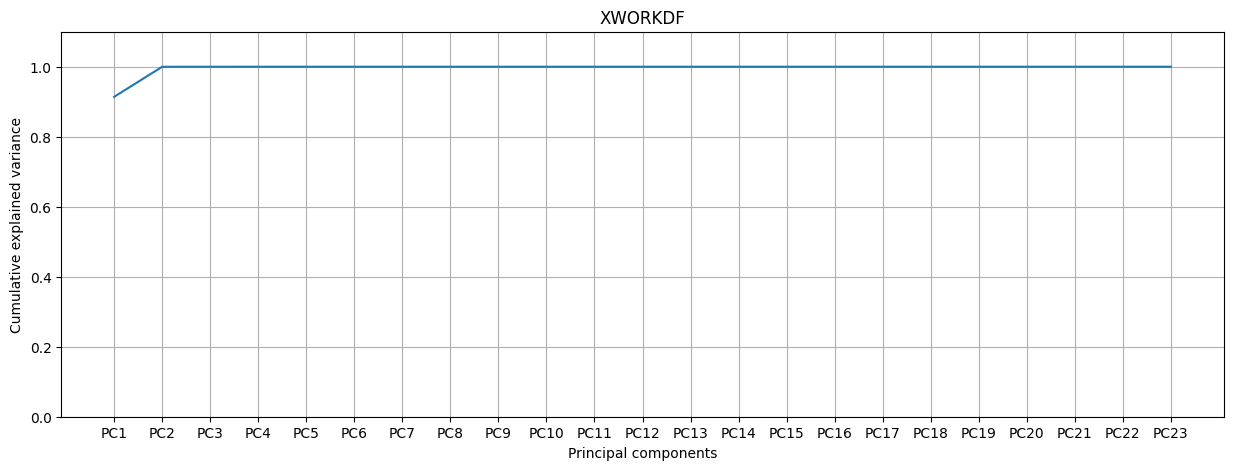

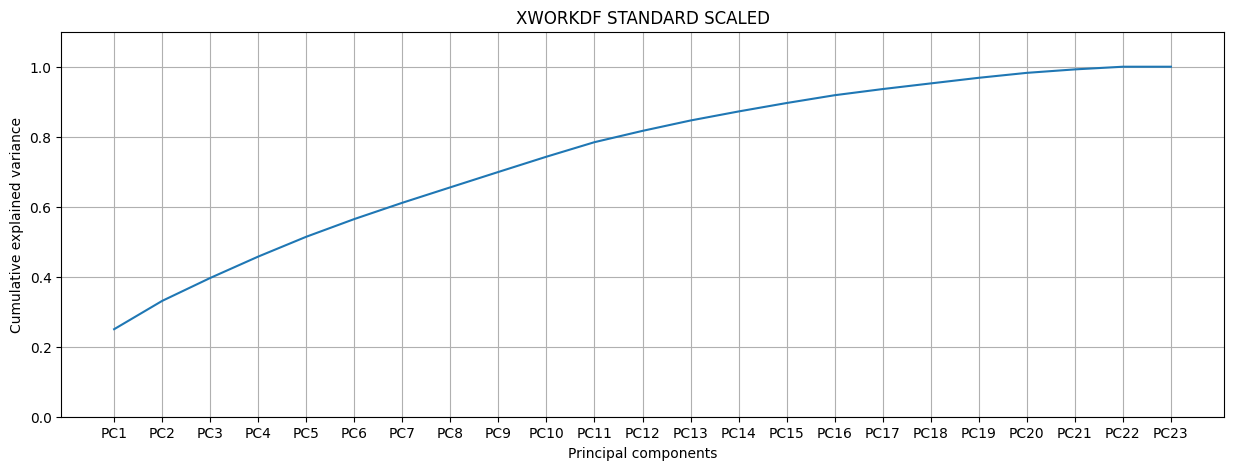

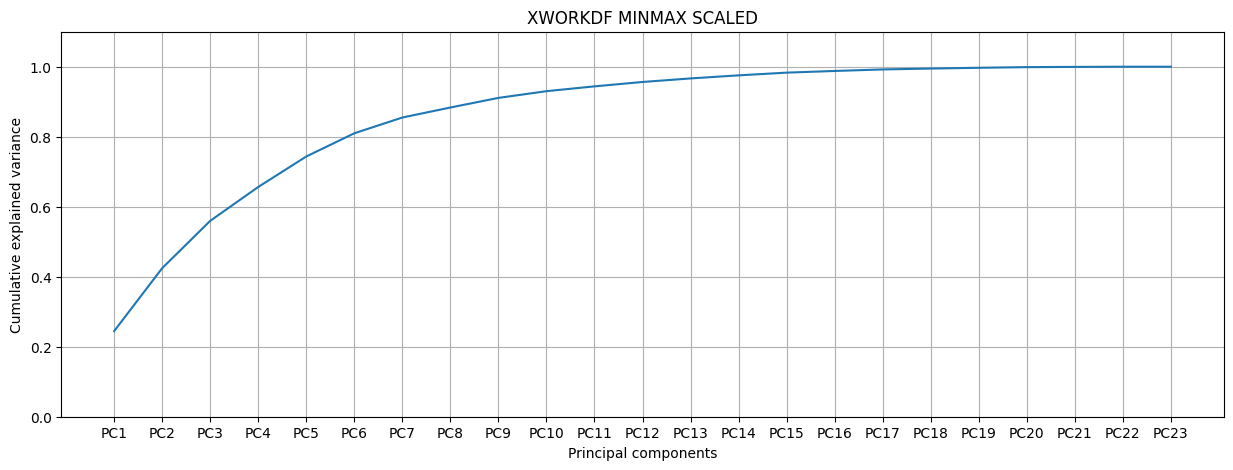

In [20]:
pca_nostd = PCA(random_state=rs)
pca_std = PCA(random_state=rs)
pca_mm = PCA(random_state=rs)

pca_nostd.fit(Xworkdf)
pca_std.fit(Xworkdf_std)
pca_mm.fit(Xworkdf_mm)

explained_variance_std = np.cumsum(pca_std.explained_variance_ratio_)
explained_variance_mm = np.cumsum(pca_mm.explained_variance_ratio_)

#pca_nostd
plt.figure(figsize=(15, 5))
plt.plot(np.cumsum(pca_nostd.explained_variance_ratio_))
plt.title('XWORKDF')
plt.ylim([0, 1.1])
plt.xticks(ticks=np.arange(pca_nostd.n_features_in_), 
           labels=[f'PC{i + 1}' for i in range(pca_nostd.n_features_in_)])
plt.xlabel('Principal components')
plt.ylabel('Cumulative explained variance')
plt.grid()
plt.show()


#pca_std
plt.figure(figsize=(15, 5))
plt.plot(np.cumsum(pca_std.explained_variance_ratio_))
plt.title('XWORKDF STANDARD SCALED')
plt.ylim([0, 1.1])
plt.xticks(ticks=np.arange(pca_std.n_features_in_), 
           labels=[f'PC{i + 1}' for i in range(pca_std.n_features_in_)])
plt.xlabel('Principal components')
plt.ylabel('Cumulative explained variance')
plt.grid()
plt.show()

#pca_mm
plt.figure(figsize=(15, 5))
plt.plot(np.cumsum(pca_mm.explained_variance_ratio_))
plt.title('XWORKDF MINMAX SCALED')
plt.ylim([0, 1.1])
plt.xticks(ticks=np.arange(pca_mm.n_features_in_), 
           labels=[f'PC{i + 1}' for i in range(pca_mm.n_features_in_)])
plt.xlabel('Principal components')
plt.ylabel('Cumulative explained variance')
plt.grid()
plt.show()


m' is the minimum number of PCs that explains 33% of the total variance.

In [35]:
# argmax = indice del primo elemento di un array > di un treshold
m_prime_std = np.argmax(explained_variance_std > 0.33) + 1
m_prime_mm = np.argmax(explained_variance_mm > 0.33) + 1

m_std = min(m_prime_std, 5)
m_mm = min(m_prime_mm, 5)

print(f'm_std is equal to: {m_std}')
print(f'm_mm is equal to: {m_mm}')

pca_std = PCA(n_components=m_std, random_state = rs)
pca_mm = PCA(n_components=m_mm, random_state=rs)

Y_Xworkdf_std = pca_std.fit_transform(Xworkdf_std)
Y_Xworkdf_mm = pca_mm.fit_transform(Xworkdf_mm)


m_std is equal to: 2
m_mm is equal to: 2


pca_std


IndexError: index 2 is out of bounds for axis 0 with size 2

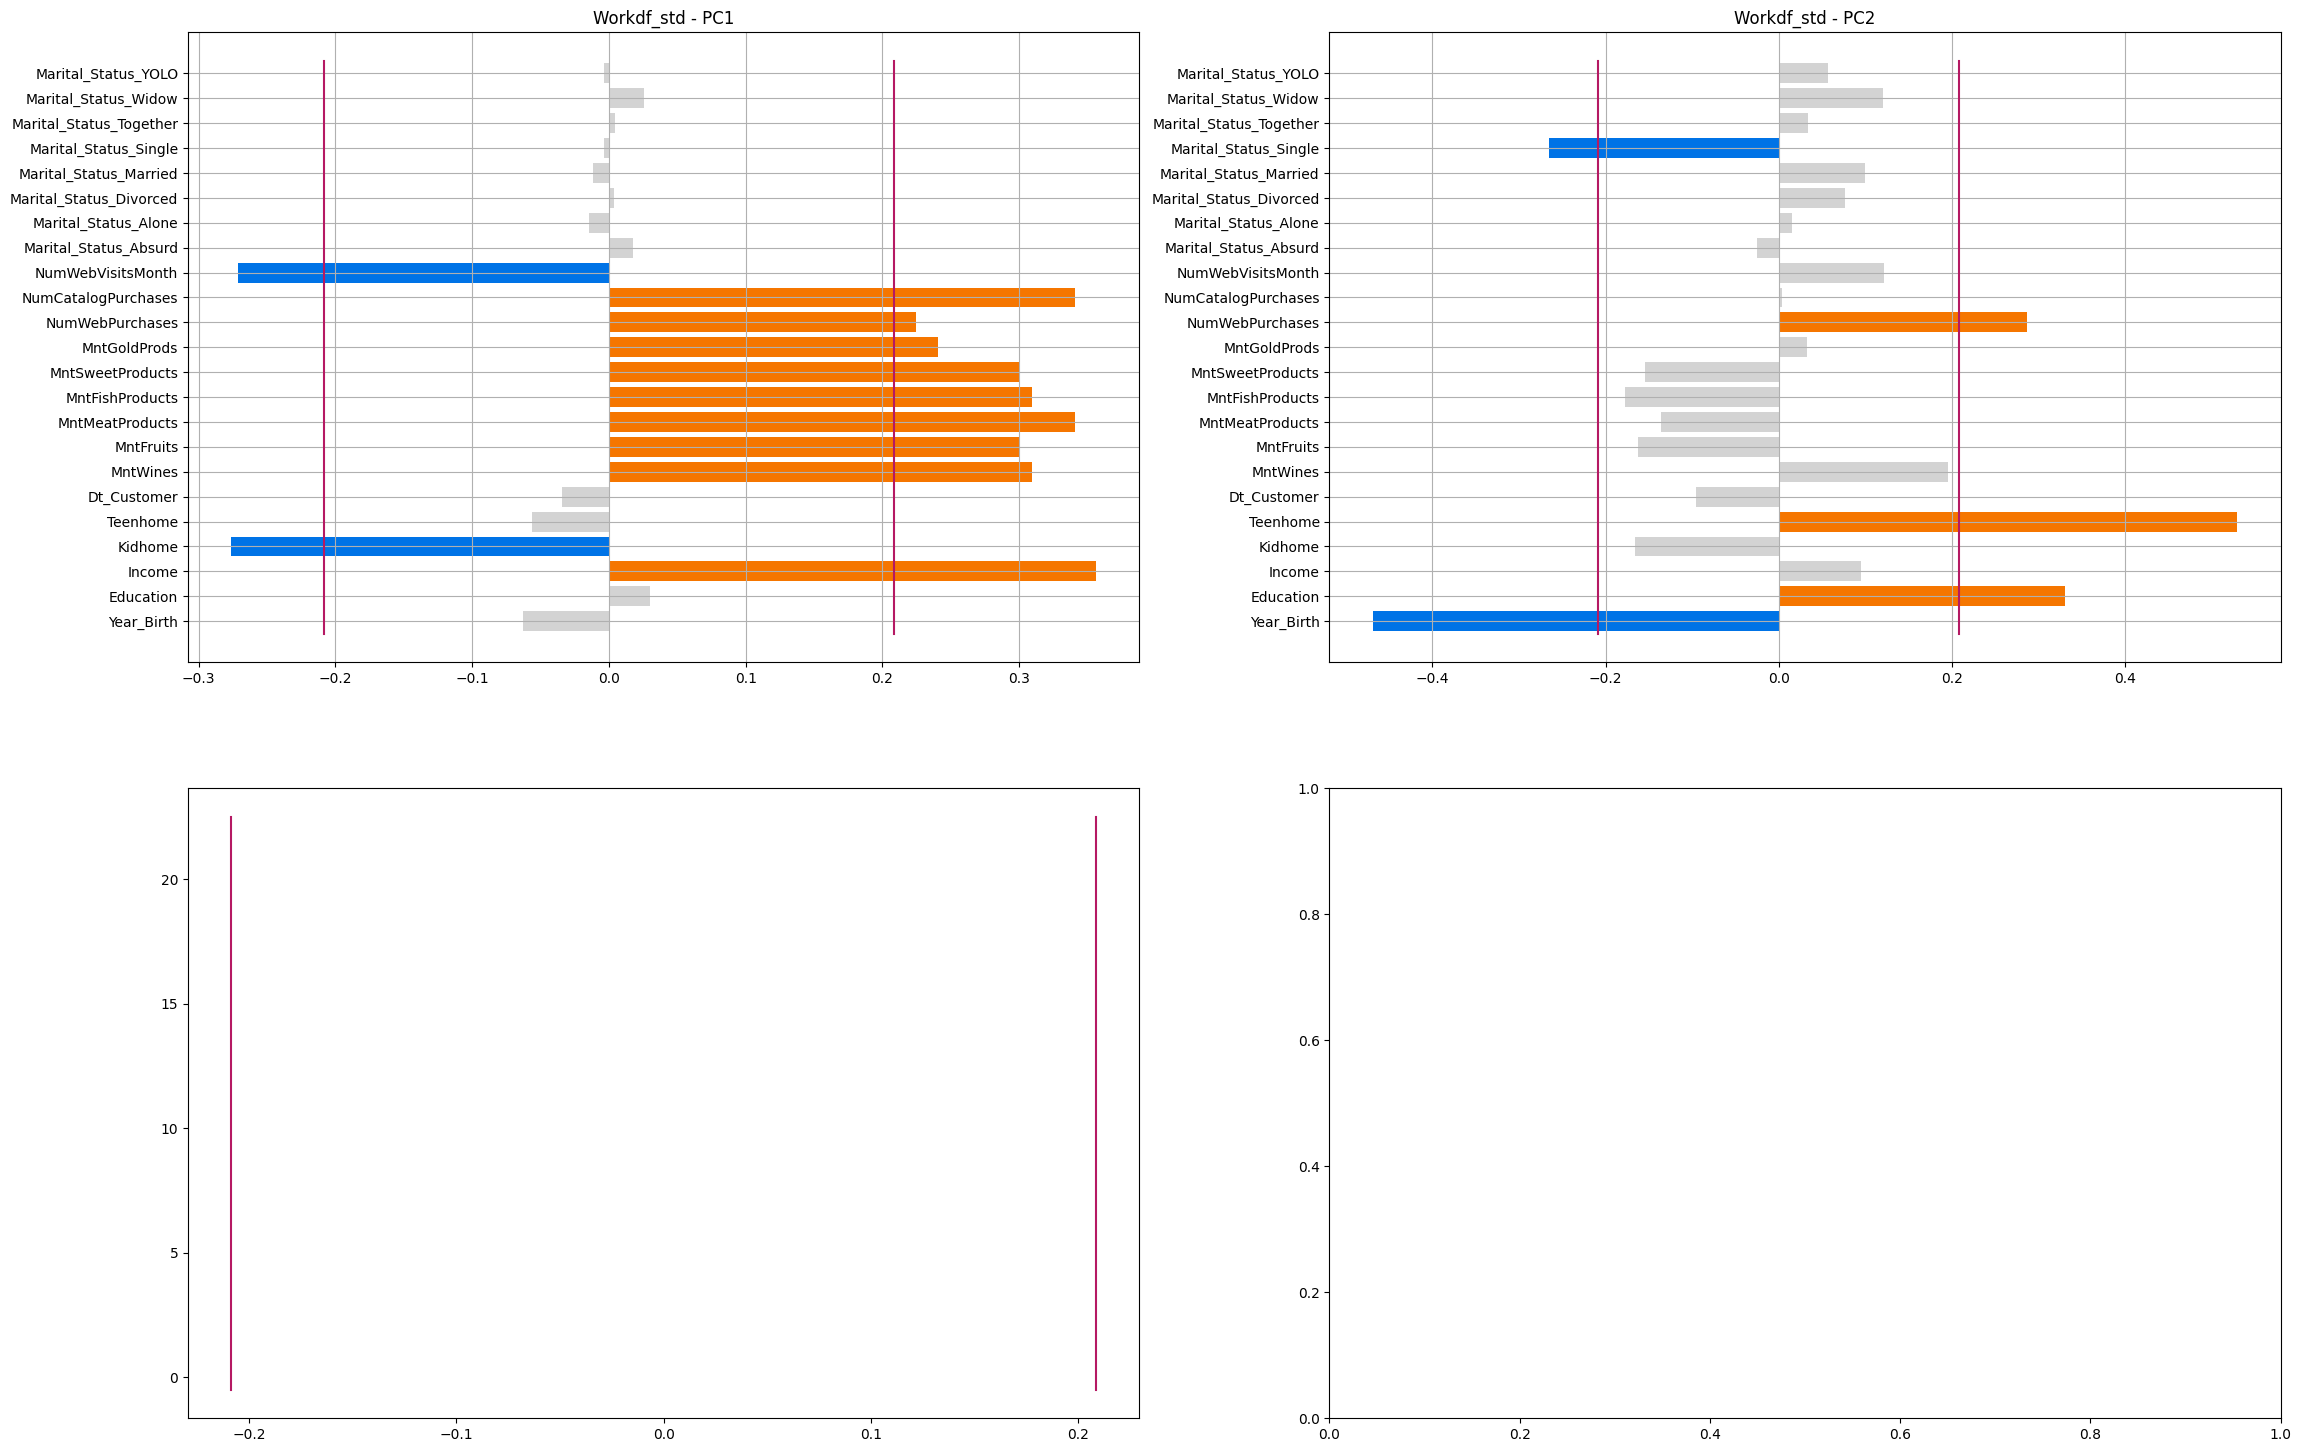

In [36]:
eps = np.sqrt(1 / Xworkdf.shape[1])

fig, ax = plt.subplots(2, 2, figsize=(27, 18))
num = 0
for i in range(0, 2):
    for j in range(0, 2):
        ax[i,j].plot([eps, eps], [-0.5, pca_std.n_features_in_ - 0.5], '#b51963')
        ax[i,j].plot([-eps, -eps], [-0.5, pca_std.n_features_in_ - 0.5],'#b51963')
        color_list = ['#F57600' if val >= eps else '#0073E6' if val <= -eps else '#D3D3D3' for val in pca_std.components_[num, :]]
        ax[i,j].barh(np.arange(pca_std.n_features_in_), pca_std.components_[num, :], color=color_list)
        ax[i,j].set_yticks(ticks=np.arange(pca_std.n_features_in_))
        ax[i,j].set_yticklabels(labels=Xworkdf_std.columns.to_list())
        ax[i,j].set_title('Workdf_std - PC%d' % (num+1))
        ax[i,j].grid()
        

        num += 1

plt.show()

pca_mm

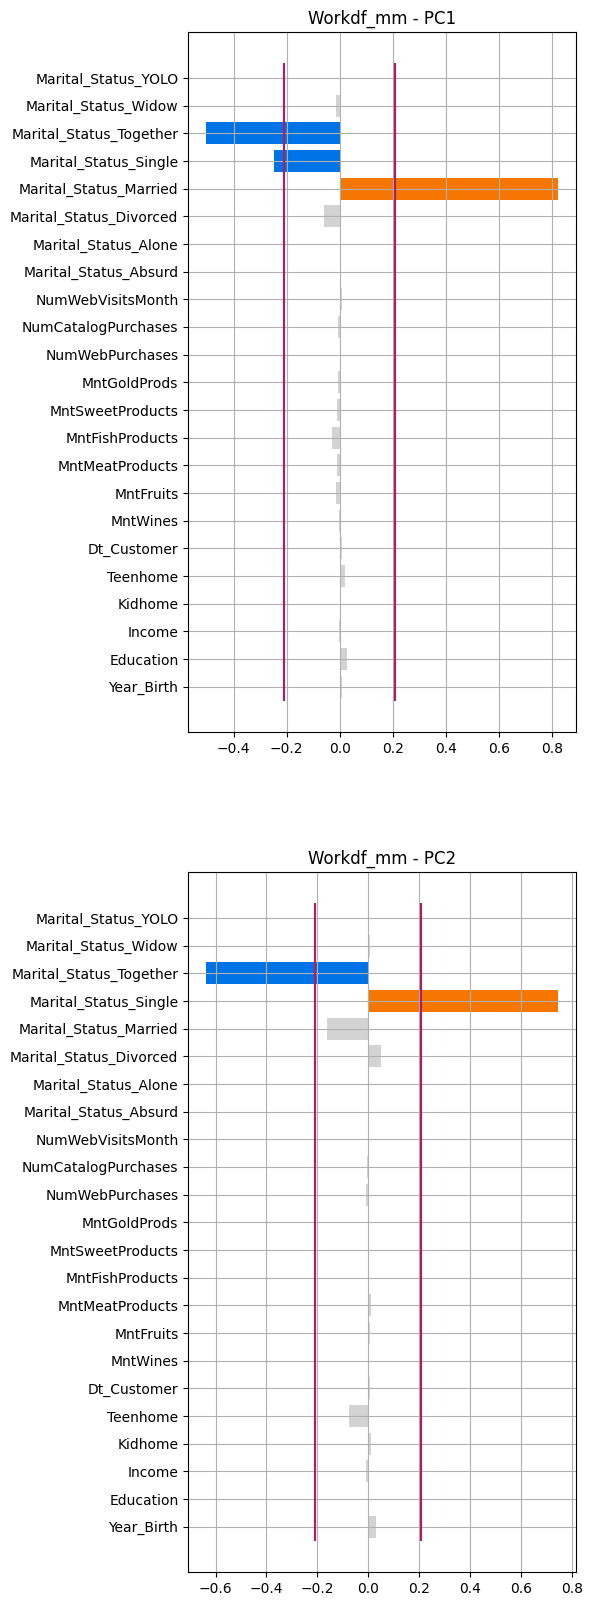

In [37]:
eps = np.sqrt(1 / Xworkdf.shape[1])

fig, ax = plt.subplots(m_mm, 1, figsize=(5, 20))
for i in range(0, m_mm):
        ax[i].plot([eps, eps], [-0.5, pca_mm.n_features_in_ - 0.5], '#b51963')
        ax[i].plot([-eps, -eps], [-0.5, pca_mm.n_features_in_ - 0.5],'#b51963')
        color_list = ['#F57600' if val >= eps else '#0073E6' if val <= -eps else '#D3D3D3' for val in pca_mm.components_[i, :]]
        ax[i].barh(np.arange(pca_mm.n_features_in_), pca_mm.components_[i, :], color=color_list)
        ax[i].set_yticks(ticks=np.arange(pca_mm.n_features_in_))
        ax[i].set_yticklabels(labels=Xworkdf_mm.columns.to_list())
        ax[i].set_title('Workdf_mm - PC%d' % (i+1))
        ax[i].grid()

plt.show()

Spieghiamo che l abbiamo trovato 

In [38]:
l_std = 2 if m_std == 2 else 3
l_mm = 2 if m_mm == 2 else 3

print(f'l_std is equal to: {l_std}')
print(f'l_mm is equal to: {l_mm}')

l_std is equal to: 2
l_mm is equal to: 2


Dato Che l_std = 3 non serve il nome per la PC4

Spiegare come nominiamo le PC e come abbreviamo sti nomi

MWV_MWS_MS_AV_C_E_K/T

In [39]:
stdPC1 = "C.Inc_Purc_vs\n_MwV_C.K"    #PC1 : Customer's Income & Purchases (+) VS Montly Web Visits of a Customer with Kids  (-)
stdPC2 = "MwSu_C.PhD_\n_T_OnShopWine_vs\n_YwSu_AvC.Grad_Single" #PC2:  Month of the Website Sign Up of a Customer with PHD & Teens that prefer Online Shopping Of Wine (+) VS Year of the Website Sign Up of a Age Verified Customer with Graduation that is Single (-) 
stdPC3 = "YwSu_C_vs\n_MwS_MwV_AvC" #PC3: Year of the Website Sign Up of a Customer (+) VS Month of the Website Sign Up & Monthly Web Visits  of a Age Verified Customer (-) 

mmPC1 = "C.Master/PhD_vs\n_C.Grad"  #PC1 : A married customer with either a Master or a PHD (+) VS A Graduated customer (-)
mmPC2 = "C.Grad_Married_vs\n_C.Single/LivTog"  #PC2: A Customer with Graduation that is Married (+) VS A customer either Single or that Live Together(-) 
# mmPC3 = "C.Single_vs\n_C.LivTog"   # PC3: A Customer that is Single (+) VS A Customer that Live Together (-)


Plot - Score Graph



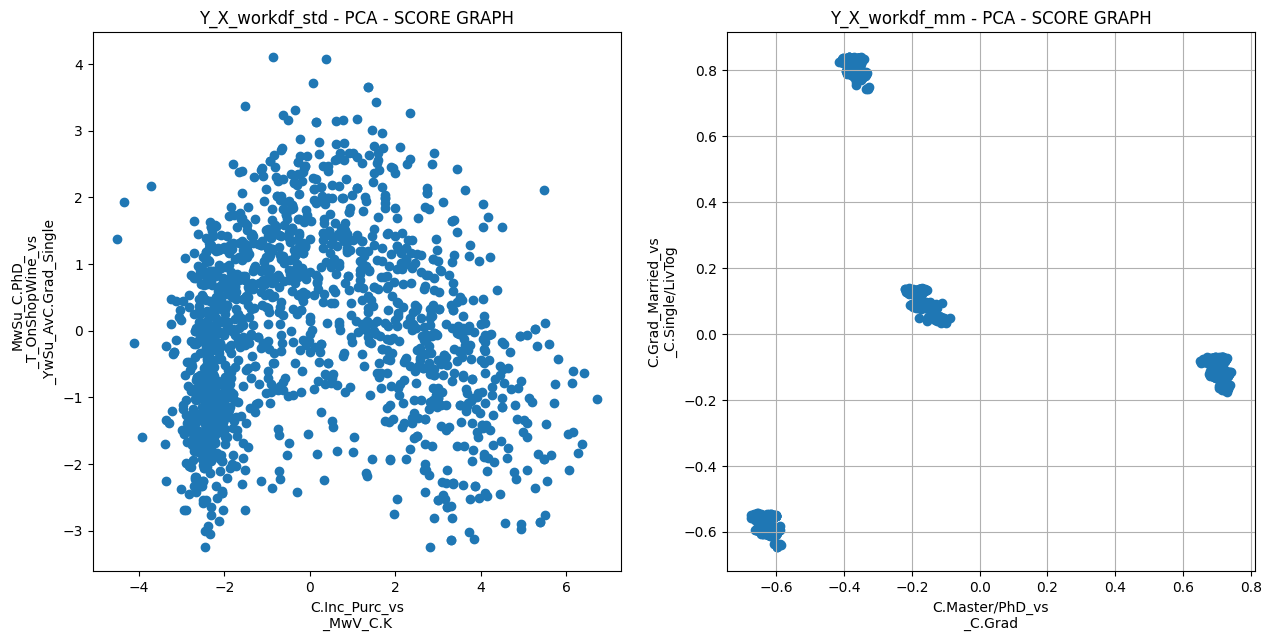

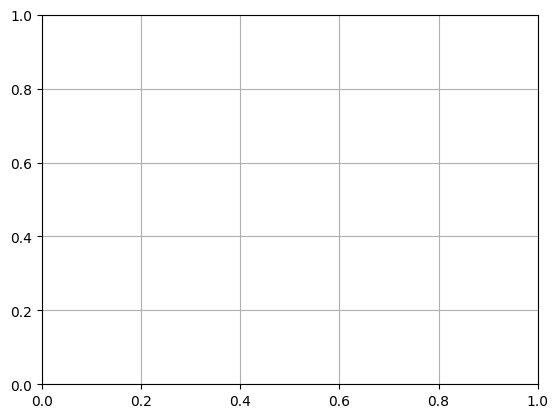

In [42]:
fig = plt.figure(figsize=(15,7)) 
#ax1 = fig.add_subplot(1, 2, 1, projection=f'{l_std}d')
ax1 = fig.add_subplot(1, 2, 1)
#ax1.scatter(Y_Xworkdf_std[:, 0], Y_Xworkdf_std[:, 1], Y_Xworkdf_std[:, 2])
ax1.scatter(Y_Xworkdf_std[:, 0], Y_Xworkdf_std[:, 1])

plt.title('Y_X_workdf_std - PCA - SCORE GRAPH')
ax1.set_xlabel(f'{stdPC1}')
ax1.set_ylabel(f'{stdPC2}') 
#ax1.set_zlabel(f'{stdPC3}')
             
ax1 = fig.add_subplot(1, 2, 2)
ax1.scatter(Y_Xworkdf_mm[:, 0], Y_Xworkdf_mm[:, 1])
plt.title('Y_X_workdf_mm - PCA - SCORE GRAPH')
ax1.set_xlabel(f'{mmPC1}')
ax1.set_ylabel(f'{mmPC2}') 
#ax1.set_zlabel(f'{mmPC3}')
plt.grid()
plt.show()
plt.grid()
plt.show()

OPTIONAL: Confronto tra colonna response e Cmp = somma delle colonne 

In [43]:
Cmp_column = workdf['AcceptedCmp1'] + workdf['AcceptedCmp2'] + workdf['AcceptedCmp3'] + workdf['AcceptedCmp4'] + workdf['AcceptedCmp5'] + workdf['Response']
workdf['Cmp'] = Cmp_column
Cmp = np.sort(Cmp_column.unique())
Response = workdf['Response'].unique()
Complain = workdf['Complain'].unique()
# fai un print piu carino
display(Complain)

array([0, 1], dtype=int64)

Commenta i displays

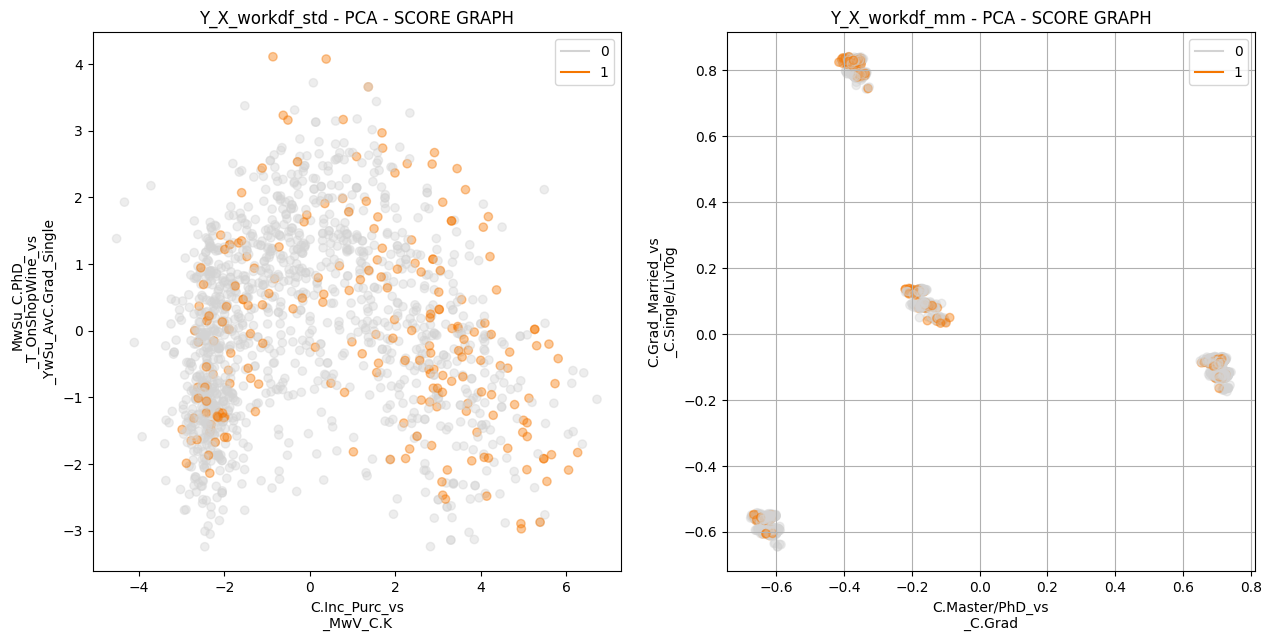

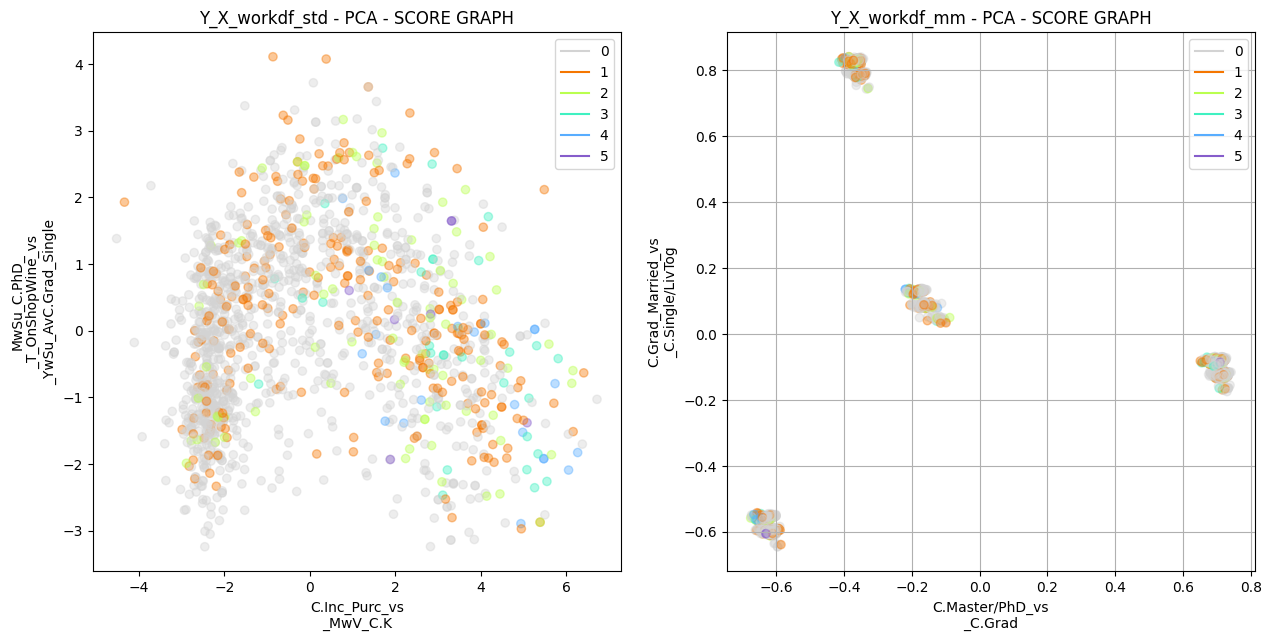

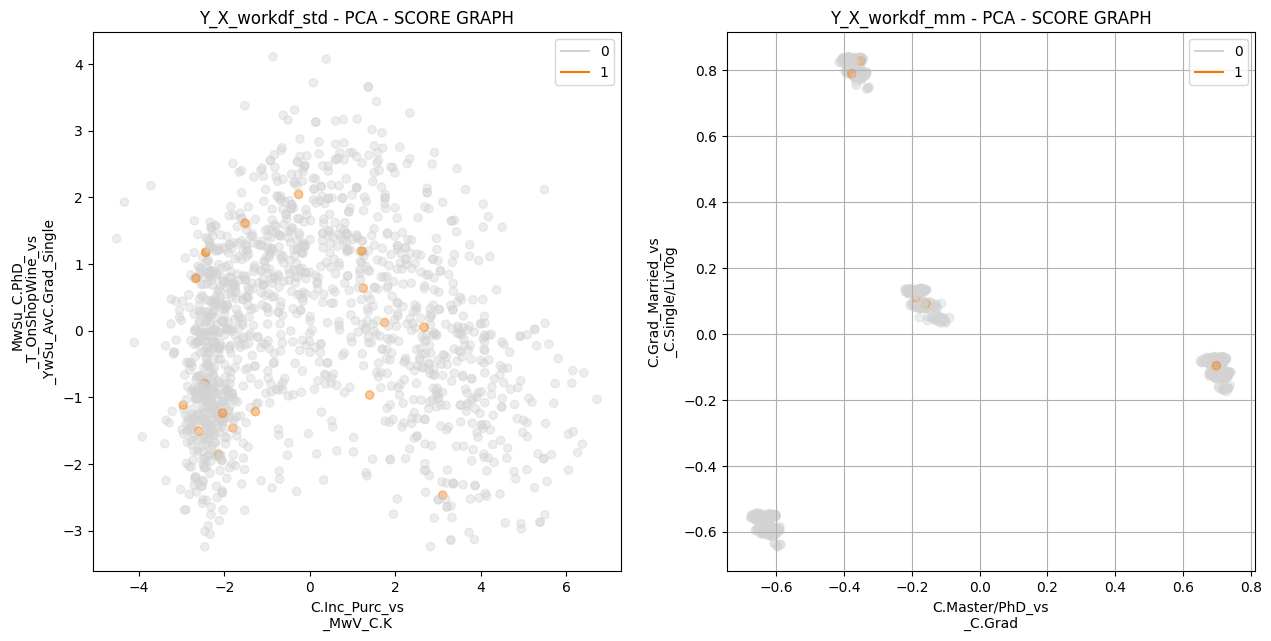

In [45]:
plt.close()
custom_colors_Response = ['#D3D3D3', '#F57600']

Response_colors = {Response[i]: custom_colors_Response[i] for i in range(len(Response))} 
workdf['color_Response'] = [Response_colors[t] for t in workdf['Response'].values]
Reponse_color_legend = [Line2D([0], [0], color=Response_colors[k]) for k in Response_colors.keys()]


fig = plt.figure(figsize=(15,7)) 
ax1 = fig.add_subplot(1, 2, 1)
ax1.scatter(Y_Xworkdf_std[:, 0], Y_Xworkdf_std[:, 1], c=workdf['color_Response'].values, alpha = 0.4)
plt.title('Y_X_workdf_std - PCA - SCORE GRAPH')
ax1.set_xlabel(f'{stdPC1}')
ax1.set_ylabel(f'{stdPC2}') 
plt.legend(Reponse_color_legend, [k for k in Response_colors.keys()])               


ax1 = fig.add_subplot(1, 2, 2)
ax1.scatter(Y_Xworkdf_mm[:, 0], Y_Xworkdf_mm[:, 1], c=workdf['color_Response'].values, alpha = 0.4)
plt.title('Y_X_workdf_mm - PCA - SCORE GRAPH')
ax1.set_xlabel(f'{mmPC1}')
ax1.set_ylabel(f'{mmPC2}') 
plt.legend(Reponse_color_legend, [k for k in Response_colors.keys()])
plt.grid()
plt.show()


custom_colors_Cmp = ['#D3D3D3', '#F57600', '#baff4f', '#3ff1c1', '#58adff', '#865dcb']
Cmp_colors = {Cmp[i]: custom_colors_Cmp[i] for i in range(len(Cmp))} 
workdf['color_Cmp'] = [Cmp_colors[t] for t in Cmp_column.values]
Cmp_color_legend = [Line2D([0], [0], color=Cmp_colors[k]) for k in Cmp_colors.keys()]


fig = plt.figure(figsize=(15,7)) 
ax1 = fig.add_subplot(1, 2, 1)
ax1.scatter(Y_Xworkdf_std[:, 0], Y_Xworkdf_std[:, 1], c=workdf['color_Cmp'].values, alpha = 0.4)
plt.title('Y_X_workdf_std - PCA - SCORE GRAPH')
ax1.set_xlabel(f'{stdPC1}')
ax1.set_ylabel(f'{stdPC2}') 
plt.legend(Cmp_color_legend, [k for k in Cmp_colors.keys()])               



ax1 = fig.add_subplot(1, 2, 2)
ax1.scatter(Y_Xworkdf_mm[:, 0], Y_Xworkdf_mm[:, 1], c=workdf['color_Cmp'].values, alpha = 0.4)
plt.title('Y_X_workdf_mm - PCA - SCORE GRAPH')
ax1.set_xlabel(f'{mmPC1}')
ax1.set_ylabel(f'{mmPC2}') 
plt.legend(Cmp_color_legend, [k for k in Cmp_colors.keys()])


plt.grid()
plt.show()

custom_colors_Complain = ['#D3D3D3', '#F57600']
Complain_colors = {Complain[i]: custom_colors_Complain[i] for i in range(len(Complain))} 
workdf['color_Complain'] = [Complain_colors[t] for t in workdf['Complain'].values]
Complain_color_legend = [Line2D([0], [0], color=Complain_colors[k]) for k in Complain_colors.keys()]

fig = plt.figure(figsize=(15,7)) 
ax1 = fig.add_subplot(1, 2, 1)
ax1.scatter(Y_Xworkdf_std[:, 0], Y_Xworkdf_std[:, 1], c=workdf['color_Complain'].values, alpha = 0.4)
plt.title('Y_X_workdf_std - PCA - SCORE GRAPH')
ax1.set_xlabel(f'{stdPC1}')
ax1.set_ylabel(f'{stdPC2}') 

plt.legend(Complain_color_legend, [k for k in Complain_colors.keys()])               



ax1 = fig.add_subplot(1, 2, 2)
ax1.scatter(Y_Xworkdf_mm[:, 0], Y_Xworkdf_mm[:, 1], c=workdf['color_Complain'].values, alpha = 0.4)
plt.title('Y_X_workdf_mm - PCA - SCORE GRAPH')
ax1.set_xlabel(f'{mmPC1}')
ax1.set_ylabel(f'{mmPC2}') 

plt.legend(Complain_color_legend, [k for k in Complain_colors.keys()])

plt.grid()
plt.show()

In [46]:
plt.close()
custom_colors_Response = ['#D3D3D3', '#F57600']

Response_colors = {Response[i]: custom_colors_Response[i] for i in range(len(Response))} 
workdf['color_Response'] = [Response_colors[t] for t in workdf['Response'].values]
Reponse_color_legend = [Line2D([0], [0], color=Response_colors[k]) for k in Response_colors.keys()]


fig = plt.figure(figsize=(15,7)) 
ax1 = fig.add_subplot(1, 2, 1, projection=f'{l_std}d')
ax1.scatter(Y_Xworkdf_std[:, 0], Y_Xworkdf_std[:, 1], Y_Xworkdf_std[:, 2], c=workdf['color_Response'].values, alpha = 0.4)
plt.title('Y_X_workdf_std - PCA - SCORE GRAPH')
ax1.set_xlabel(f'{stdPC1}')
ax1.set_ylabel(f'{stdPC2}') 
ax1.set_zlabel(f'{stdPC3}')
plt.legend(Reponse_color_legend, [k for k in Response_colors.keys()])               


ax1 = fig.add_subplot(1, 2, 2)
ax1.scatter(Y_Xworkdf_mm[:, 0], Y_Xworkdf_mm[:, 1], c=workdf['color_Response'].values, alpha = 0.4)
plt.title('Y_X_workdf_mm - PCA - SCORE GRAPH')
ax1.set_xlabel(f'{mmPC1}')
ax1.set_ylabel(f'{mmPC2}') 
plt.legend(Reponse_color_legend, [k for k in Response_colors.keys()])
plt.grid()
plt.show()


custom_colors_Cmp = ['#D3D3D3', '#F57600', '#baff4f', '#3ff1c1', '#58adff', '#865dcb']
Cmp_colors = {Cmp[i]: custom_colors_Cmp[i] for i in range(len(Cmp))} 
workdf['color_Cmp'] = [Cmp_colors[t] for t in Cmp_column.values]
Cmp_color_legend = [Line2D([0], [0], color=Cmp_colors[k]) for k in Cmp_colors.keys()]


fig = plt.figure(figsize=(15,7)) 
ax1 = fig.add_subplot(1, 2, 1, projection=f'{l_std}d')
ax1.scatter(Y_Xworkdf_std[:, 0], Y_Xworkdf_std[:, 1], Y_Xworkdf_std[:, 2], c=workdf['color_Cmp'].values, alpha = 0.4)
plt.title('Y_X_workdf_std - PCA - SCORE GRAPH')
ax1.set_xlabel(f'{stdPC1}')
ax1.set_ylabel(f'{stdPC2}') 
ax1.set_zlabel(f'{stdPC3}')
plt.legend(Cmp_color_legend, [k for k in Cmp_colors.keys()])               



ax1 = fig.add_subplot(1, 2, 2)
ax1.scatter(Y_Xworkdf_mm[:, 0], Y_Xworkdf_mm[:, 1], c=workdf['color_Cmp'].values, alpha = 0.4)
plt.title('Y_X_workdf_mm - PCA - SCORE GRAPH')
ax1.set_xlabel(f'{mmPC1}')
ax1.set_ylabel(f'{mmPC2}') 
plt.legend(Cmp_color_legend, [k for k in Cmp_colors.keys()])


plt.grid()
plt.show()

custom_colors_Complain = ['#D3D3D3', '#F57600']
Complain_colors = {Complain[i]: custom_colors_Complain[i] for i in range(len(Complain))} 
workdf['color_Complain'] = [Complain_colors[t] for t in workdf['Complain'].values]
Complain_color_legend = [Line2D([0], [0], color=Complain_colors[k]) for k in Complain_colors.keys()]

fig = plt.figure(figsize=(15,7)) 
ax1 = fig.add_subplot(1, 2, 1, projection=f'{l_std}d')
ax1.scatter(Y_Xworkdf_std[:, 0], Y_Xworkdf_std[:, 1], Y_Xworkdf_std[:, 2], c=workdf['color_Complain'].values, alpha = 0.4)
plt.title('Y_X_workdf_std - PCA - SCORE GRAPH')
ax1.set_xlabel(f'{stdPC1}')
ax1.set_ylabel(f'{stdPC2}') 
ax1.set_zlabel(f'{stdPC3}')
plt.legend(Complain_color_legend, [k for k in Complain_colors.keys()])               



ax1 = fig.add_subplot(1, 2, 2)
ax1.scatter(Y_Xworkdf_mm[:, 0], Y_Xworkdf_mm[:, 1], c=workdf['color_Complain'].values, alpha = 0.4)
plt.title('Y_X_workdf_mm - PCA - SCORE GRAPH')
ax1.set_xlabel(f'{mmPC1}')
ax1.set_ylabel(f'{mmPC2}') 

plt.legend(Complain_color_legend, [k for k in Complain_colors.keys()])

plt.grid()
plt.show()

ValueError: Unknown projection '2d'

<Figure size 1500x700 with 0 Axes>

IndexError: index 2 is out of bounds for axis 1 with size 2

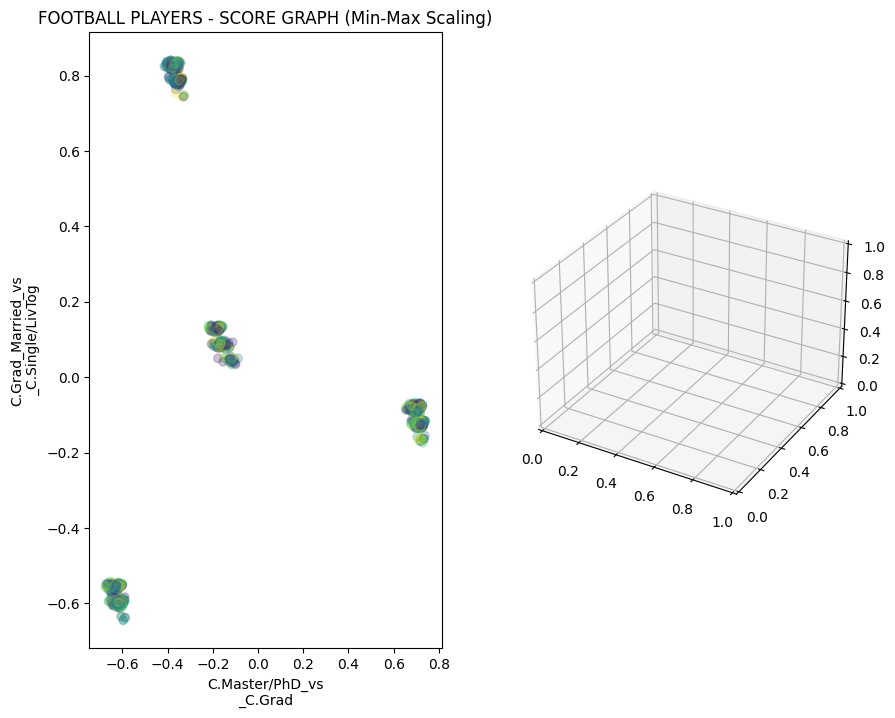

In [47]:
# MAKE THE 3D SCORE GRAPH
fig_recency = plt.figure(figsize=(10, 8))

# First subplot
ax_recency1 = fig_recency.add_subplot(121)
scatter1 = ax_recency1.scatter(Y_Xworkdf_mm[:, 0], Y_Xworkdf_mm[:, 1], c=workdf['Recency'].values, alpha=0.25)
ax_recency1.set_title('FOOTBALL PLAYERS - SCORE GRAPH (Min-Max Scaling)')
ax_recency1.set_xlabel(f'{mmPC1}')
ax_recency1.set_ylabel(f'{mmPC2}')

# Second subplot

ax_recency2 = fig_recency.add_subplot(122, projection='3d')
scatter2 = ax_recency2.scatter(Y_Xworkdf_std[:, 0], Y_Xworkdf_std[:, 1], Y_Xworkdf_std[:, 2], c=workdf['Recency'].values, alpha=0.25)
ax_recency2.set_title('FOOTBALL PLAYERS - SCORE GRAPH (Standard Scaling)')
ax_recency2.set_xlabel(f'{stdPC1}')
ax_recency2.set_ylabel(f'{stdPC2}')
ax_recency2.set_zlabel(f'{stdPC3}')

# Adjust layout
fig_recency.tight_layout()

# Add colorbar
cbar = fig_recency.colorbar(scatter2)

# Show the plot
plt.grid()
plt.show()

## 5. k-Means

k-Means algorithm using the *silhouette coefficient*

In [48]:
k_list = [i for i in range(3, 11)]
km_list_std = []
km_list_mm = []
silcoeff_list_std = []
silcoeff_list_mm = []

for i in range(len(k_list)):
    km_list_std.append(KMeans(n_clusters=k_list[i], n_init="auto", random_state=rs))
    km_list_mm.append(KMeans(n_clusters=k_list[i], n_init="auto", random_state=rs))
    cluster_labels_std = km_list_std[i].fit_predict(Y_Xworkdf_std[:,0:l_std])
    cluster_labels_mm = km_list_mm[i].fit_predict(Y_Xworkdf_mm)
    silhouette_avg_std = silhouette_score(Y_Xworkdf_std, cluster_labels_std)
    silhouette_avg_mm = silhouette_score(Y_Xworkdf_mm, cluster_labels_mm)
    silcoeff_list_std.append(silhouette_avg_std)
    silcoeff_list_mm.append(silhouette_avg_mm)

    print(
        "For n_clusters =",
        k_list[i],
        "\n - silhouette_score_std is:\t",
        silhouette_avg_std,
        "\n - silhouette_score_mm is:\t",
        silhouette_avg_mm
    )
    
best_k_std = k_list[np.argmax(silcoeff_list_std)]
best_k_mm = k_list[np.argmax(silcoeff_list_mm)]
km_std = km_list_std[np.argmax(silcoeff_list_std)]
km_mm = km_list_mm[np.argmax(silcoeff_list_mm)]
    
print(f'\n\nBest silhouette_score_std:\t{np.max(silcoeff_list_std):.5f} => n_cluster= {best_k_std}') 
print(f'Best silhouette_score_mm:\t{np.max(silcoeff_list_mm):.5f} => n_cluster= {best_k_mm}')   

For n_clusters = 3 
 - silhouette_score_std is:	 0.4710768587465344 
 - silhouette_score_mm is:	 0.8505050334305724
For n_clusters = 4 
 - silhouette_score_std is:	 0.41088807595036997 
 - silhouette_score_mm is:	 0.954180186855232
For n_clusters = 5 
 - silhouette_score_std is:	 0.38529737455458374 
 - silhouette_score_mm is:	 0.8282102206703829
For n_clusters = 6 
 - silhouette_score_std is:	 0.39594054111495214 
 - silhouette_score_mm is:	 0.753351054023021
For n_clusters = 7 
 - silhouette_score_std is:	 0.376252953561678 
 - silhouette_score_mm is:	 0.6627770319222399
For n_clusters = 8 
 - silhouette_score_std is:	 0.3752628916278437 
 - silhouette_score_mm is:	 0.605595248913418
For n_clusters = 9 
 - silhouette_score_std is:	 0.38242693183943455 
 - silhouette_score_mm is:	 0.6156307594459686
For n_clusters = 10 
 - silhouette_score_std is:	 0.37481700684515945 
 - silhouette_score_mm is:	 0.5923198980992965


Best silhouette_score_std:	0.47108 => n_cluster= 3
Best silhouette_s

In [ ]:
np.arange(km_std.cluster_centers_.shape[1])

array([0, 1, 2])

In [ ]:
maxs_std = Y_Xworkdf_std[:, 0:l_std].max(axis=0) 
mins_std = Y_Xworkdf_std[:, 0:l_std].min(axis=0) 

maxs_mm = Y_Xworkdf_mm.max(axis=0) 
mins_mm = Y_Xworkdf_mm.min(axis=0) 

fig_std, ax_std = plt.subplots(1, 3, figsize=(14, 3))
for ii in range(3):
    ax_std[ii].barh(np.arange(km_std.cluster_centers_.shape[1]), maxs_std, color='blue', alpha=0.15)
    ax_std[ii].barh(np.arange(km_std.cluster_centers_.shape[1]), mins_std, color='blue', alpha=0.15)
    ax_std[ii].barh(np.arange(km_std.cluster_centers_.shape[1]), km_std.cluster_centers_[ii, :])
    display(km_std.cluster_centers_[ii, :])
    ax_std[ii].set_yticks(ticks=np.arange(km_std.cluster_centers_.shape[1]))
    ax_std[ii].set_yticklabels(labels=[stdPC1, stdPC2, stdPC3], rotation=0)  # Note the rotation value
    ax_std[ii].grid(visible=True, which='both')
    ax_std[ii].set_title(f'Standard - CENTROID {ii+1}')
fig_std.tight_layout()

fig_mm, ax_mm = plt.subplots(2, 2, figsize=(14, 5))
num = 0
for ii in range(2):
    for jj in range(2):
        ax_mm[ii,jj].barh(np.arange(km_mm.cluster_centers_.shape[1]), maxs_mm, color='blue', alpha=0.15)
        ax_mm[ii,jj].barh(np.arange(km_mm.cluster_centers_.shape[1]), mins_mm, color='blue', alpha=0.15)
        ax_mm[ii,jj].barh(np.arange(km_mm.cluster_centers_.shape[1]), km_mm.cluster_centers_[num, :])
        ax_mm[ii,jj].set_yticks(ticks=np.arange(km_mm.cluster_centers_.shape[1]))
        ax_mm[ii,jj].set_yticklabels(labels=[mmPC1, mmPC2], rotation=0)
        ax_mm[ii,jj].grid(visible=True, which='both')
        ax_mm[ii,jj].set_title(f'MinMax - CENTROID {num+1}')
        num += 1
fig_mm.tight_layout()




array([-2.14505192, -0.54349106])

ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of ticklabels (3).

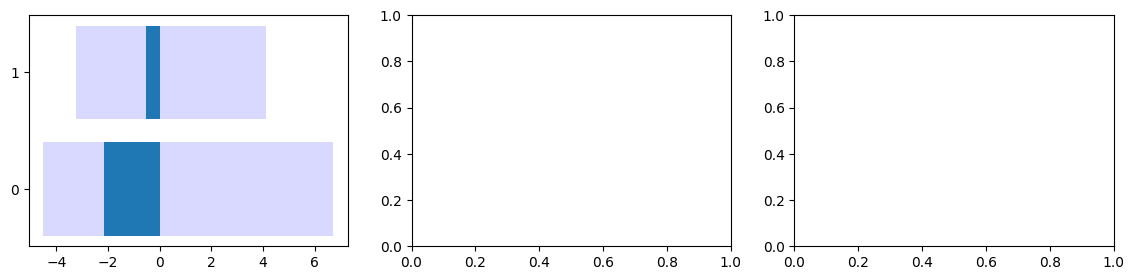

In [49]:
maxs_std = Y_Xworkdf_std[:, 0:l_std].max(axis=0) 
mins_std = Y_Xworkdf_std[:, 0:l_std].min(axis=0) 

maxs_mm = Y_Xworkdf_mm.max(axis=0) 
mins_mm = Y_Xworkdf_mm.min(axis=0) 

fig_std, ax_std = plt.subplots(1, 3, figsize=(14, 3))
for ii in range(3):
    ax_std[ii].barh(np.arange(km_std.cluster_centers_.shape[1]), maxs_std, color='blue', alpha=0.15)
    ax_std[ii].barh(np.arange(km_std.cluster_centers_.shape[1]), mins_std, color='blue', alpha=0.15)
    ax_std[ii].barh(np.arange(km_std.cluster_centers_.shape[1]), km_std.cluster_centers_[ii, :])
    display(km_std.cluster_centers_[ii, :])
    ax_std[ii].set_yticks(ticks=np.arange(km_std.cluster_centers_.shape[1]))
    ax_std[ii].set_yticklabels(labels=[stdPC1, stdPC2, stdPC3], rotation=0)  # Note the rotation value
    ax_std[ii].grid(visible=True, which='both')
    ax_std[ii].set_title(f'Standard - CENTROID {ii+1}')
fig_std.tight_layout()

fig_mm, ax_mm = plt.subplots(2, 2, figsize=(14, 5))
num = 0
for ii in range(2):
    for jj in range(2):
        ax_mm[ii,jj].barh(np.arange(km_mm.cluster_centers_.shape[1]), maxs_mm, color='blue', alpha=0.15)
        ax_mm[ii,jj].barh(np.arange(km_mm.cluster_centers_.shape[1]), mins_mm, color='blue', alpha=0.15)
        ax_mm[ii,jj].barh(np.arange(km_mm.cluster_centers_.shape[1]), km_mm.cluster_centers_[num, :])
        ax_mm[ii,jj].set_yticks(ticks=np.arange(km_mm.cluster_centers_.shape[1]))
        ax_mm[ii,jj].set_yticklabels(labels=[mmPC1, mmPC2], rotation=0)
        ax_mm[ii,jj].grid(visible=True, which='both')
        ax_mm[ii,jj].set_title(f'MinMax - CENTROID {num+1}')
        num += 1
fig_mm.tight_layout()




## 6. Clusters and Centroid Interpretation and Visualization

STD:
1. Cluster 1: "Customers with many Kids, that Mainly uses the website"
2. Cluster 2: "Rich Customers"
3. Cluster 3: "Customers registered in the last period of a year, with teens and a Phd, that buy wine online"

MM
1. Cluster 1: "Either Married Customers with Graduation or customers with Phd or Master"
1. Cluster 1: "Customers with Master or Phd that are Married"
2. Cluster 2: "Customers with Graduation"
3. Cluster 3: "Customers with Master or Phd that live together"
4. Cluster 4: "Customers with Master or Phd that are single"
5. Cluster 5: "Customers with Graduation that are Married"
6. Cluster 6: "Customers with Graduation that live together"
7. Cluster 7: "Customers with Graduation that are single"
8. Cluster 8: "Customers with Master or Phd that are single or live together



In [50]:
cluster_names_std = ['Customers with many Kids, that Mainly uses the website',
                     'Rich Customers',
                     'Customers registered in the last period of a year, with teens and a Phd, that buy wine online'

]

In [51]:
cluster_names_mm = ["Customers with Master or Phd that are Married",
                    "Customers with Graduation",
                    "Customers with Master or Phd that live together",
                    "Customers with Master or Phd that are single",
]

In [319]:
# 1. Cluster 1: "A Young, New, Graduated and Single Customer with many Kids, that Manly uses the website"

In [52]:
marker_dict_mm = {
    0: '*', 
    1: 'o', 
    2: 'd',
    3: '^',
}
unique_labels = np.unique(km_mm.labels_)
missing_labels = set(unique_labels) - set(marker_dict_mm.keys())
display(unique_labels)

for ll in km_mm.labels_:
    print(ll)

array([0, 1, 2, 3])

0
0
0
2
1
0
0
0
0
1
3
3
1
0
1
1
1
0
2
0
3
2
1
0
1
1
1
1
0
0
0
1
1
0
1
2
3
1
2
3
2
0
3
0
0
3
2
2
0
2
2
0
0
1
0
1
0
0
0
2
1
1
0
1
1
1
1
3
2
0
2
0
0
0
1
2
0
1
0
1
1
2
0
1
3
0
1
2
3
2
2
3
2
1
0
0
3
0
1
1
1
1
1
0
0
1
0
2
2
1
3
3
2
0
3
1
2
3
0
3
3
0
0
1
2
3
0
0
1
0
1
2
0
1
0
2
2
0
1
0
3
2
3
1
0
3
2
0
1
0
0
2
3
1
2
1
0
1
1
1
2
1
1
1
1
3
0
1
0
3
0
2
3
0
1
0
0
2
2
0
0
2
0
1
2
0
0
2
0
1
0
1
0
2
2
2
0
2
0
0
0
1
2
1
2
2
0
0
3
2
1
0
0
1
1
1
0
2
3
1
3
2
1
1
0
1
1
2
0
3
0
1
0
2
0
2
3
0
0
0
0
1
1
1
0
2
2
0
3
2
1
3
3
1
2
2
0
3
0
2
3
0
0
2
0
0
0
2
1
2
0
0
0
1
0
1
0
1
1
0
0
0
0
2
3
1
1
1
0
0
1
1
0
0
0
0
0
0
0
2
0
0
3
1
1
0
1
1
1
0
1
0
3
3
1
0
3
1
2
1
3
0
1
2
0
3
2
0
2
2
0
1
1
2
1
3
0
2
0
2
0
0
0
2
1
1
2
0
0
2
1
2
3
2
2
0
0
0
3
1
0
0
2
1
0
0
0
0
0
3
2
0
2
0
2
0
1
3
0
1
3
0
0
3
0
0
0
0
0
1
3
3
0
2
2
1
0
0
1
3
1
1
1
1
0
0
2
1
3
3
2
2
0
1
1
2
2
3
3
3
0
0
0
2
2
3
1
3
2
0
3
1
2
0
3
1
1
1
0
0
1
2
0
1
3
3
2
0
1
0
0
3
0
1
0
0
1
0
1
0
0
3
3
0
0
2
0
1
3
2
1
0
1
1
2
2
1
0
1
1
1
1
1
3
0
1
0
0
2
1
1
1
0
2
0
0
0
3
3
0


In [ ]:
wine['target'].values[km_std.labels_ == ll]

NameError: name 'wine' is not defined

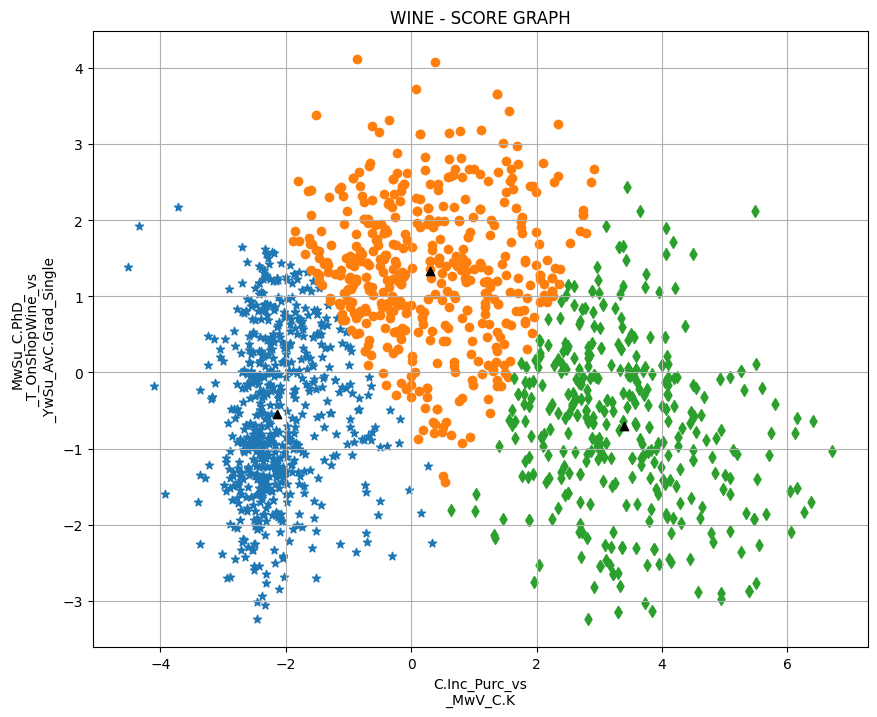

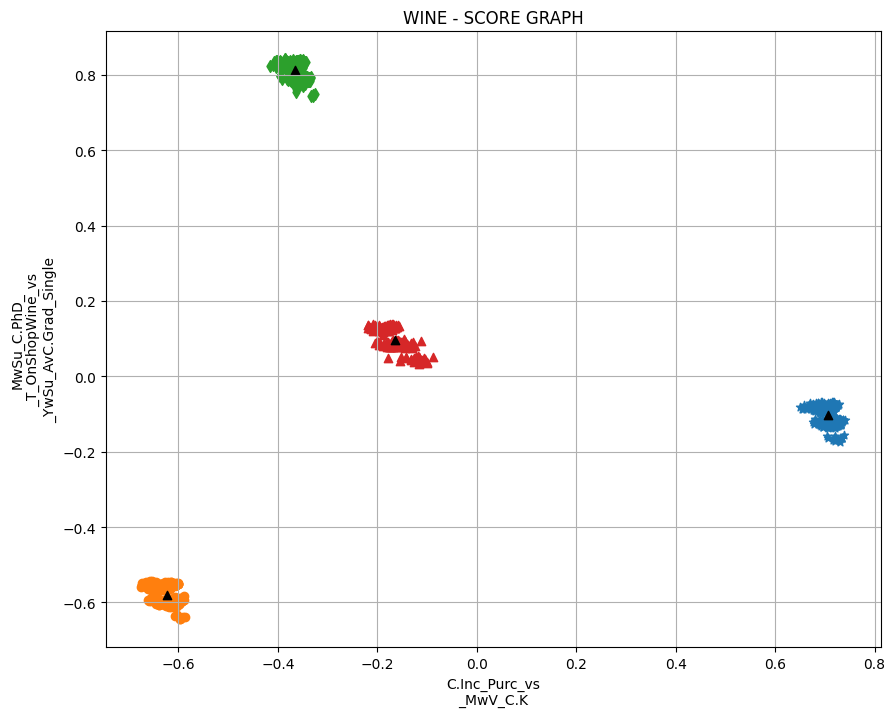

In [55]:
# markers_dict_std = {0: '*', 1: 'o', 2: 'd'}
markers_dict_std = {
    0: '*', 
    1: 'o', 
    2: 'd',
    3: '^',
    4: 's',
    5: 'p',
    6: 'H'
}
'''markers_dict_mm = {
    0: '*', 
    1: 'o', 
    2: 'd',
    3: '^',
    4: 's',
    5: 'p',
    6: 'H',
    7: '8',
    8: '>',
    9: '<'
}
'''

markers_dict_mm = {
    0: '*', 
    1: 'o', 
    2: 'd',
    3: '^'
}


#fig_stdscore = plt.figure()
#ax = fig_stdscore.add_subplot(111, projection='3d')
#for ll in km_std.labels_:
#    ax.scatter(Y_Xworkdf_std[:, 0:l_std][km_std.labels_ == ll, 0], Y_Xworkdf_std[:, 0:l_std][km_std.labels_ == ll, 1], Y_Xworkdf_std[:, 0:l_std][km_std.labels_ == ll, 2], marker=markers_dict_std[ll])
#ax.scatter(km_std.cluster_centers_[:, 0], km_std.cluster_centers_[:, 1], km_std.cluster_centers_[:, 2], c='black', marker='^')
#plt.title('WINE - SCORE GRAPH (Symbol=Cluster, Color=Class)')
#ax.set_xlabel('PC1')
#ax.set_ylabel('PC2')
#ax.set_zlabel('PC3')
#plt.grid()
#plt.show()

fig_stdscore = plt.figure(figsize=(10, 8))
ax = fig_stdscore.add_subplot(111)
#for ll in km_mm.labels_:
for ll in np.unique(km_std.labels_):
    ax.scatter(Y_Xworkdf_std[km_std.labels_ == ll, 0], Y_Xworkdf_std[km_std.labels_ == ll, 1], marker=markers_dict_std[ll])
ax.scatter(km_std.cluster_centers_[:, 0], km_std.cluster_centers_[:, 1], c='black', marker='^')
plt.title('WINE - SCORE GRAPH' )
ax.set_xlabel(f'{stdPC1}')
ax.set_ylabel(f'{stdPC2}')

plt.grid()
plt.show()


fig_stdscore = plt.figure(figsize=(10, 8))
ax = fig_stdscore.add_subplot(111)
#for ll in km_mm.labels_:
for ll in np.unique(km_mm.labels_):
    ax.scatter(Y_Xworkdf_mm[km_mm.labels_ == ll, 0], Y_Xworkdf_mm[km_mm.labels_ == ll, 1], marker=markers_dict_mm[ll])
ax.scatter(km_mm.cluster_centers_[:, 0], km_mm.cluster_centers_[:, 1], c='black', marker='^')
plt.title('WINE - SCORE GRAPH')
ax.set_xlabel(f'{stdPC1}')
ax.set_ylabel(f'{stdPC2}')
plt.grid()
plt.show()





IndexError: index 2 is out of bounds for axis 1 with size 2

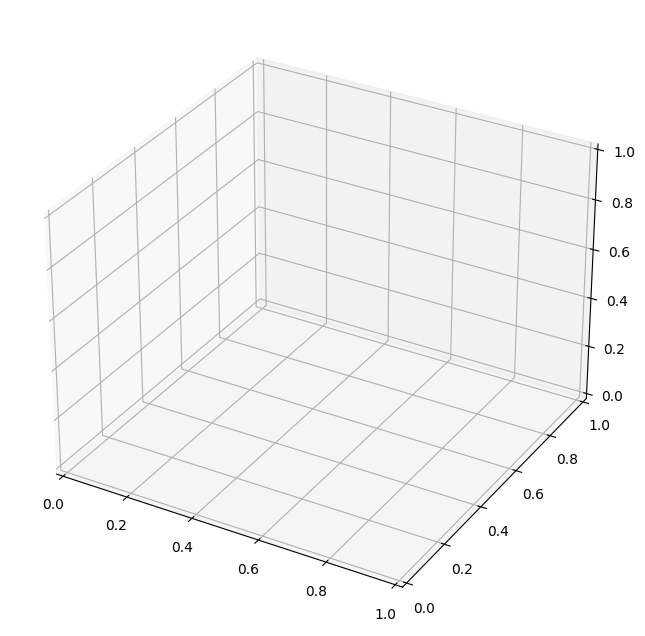

In [53]:
# markers_dict_std = {0: '*', 1: 'o', 2: 'd'}
markers_dict_std = {
    0: '*', 
    1: 'o', 
    2: 'd',
    3: '^',
    4: 's',
    5: 'p',
    6: 'H'
}
'''markers_dict_mm = {
    0: '*', 
    1: 'o', 
    2: 'd',
    3: '^',
    4: 's',
    5: 'p',
    6: 'H',
    7: '8',
    8: '>',
    9: '<'
}
'''

markers_dict_mm = {
    0: '*', 
    1: 'o', 
    2: 'd',
    3: '^'
}


#fig_stdscore = plt.figure()
#ax = fig_stdscore.add_subplot(111, projection='3d')
#for ll in km_std.labels_:
#    ax.scatter(Y_Xworkdf_std[:, 0:l_std][km_std.labels_ == ll, 0], Y_Xworkdf_std[:, 0:l_std][km_std.labels_ == ll, 1], Y_Xworkdf_std[:, 0:l_std][km_std.labels_ == ll, 2], marker=markers_dict_std[ll])
#ax.scatter(km_std.cluster_centers_[:, 0], km_std.cluster_centers_[:, 1], km_std.cluster_centers_[:, 2], c='black', marker='^')
#plt.title('WINE - SCORE GRAPH (Symbol=Cluster, Color=Class)')
#ax.set_xlabel('PC1')
#ax.set_ylabel('PC2')
#ax.set_zlabel('PC3')
#plt.grid()
#plt.show()

fig_stdscore = plt.figure(figsize=(10, 8))
ax = fig_stdscore.add_subplot(111, projection='3d')
#for ll in km_mm.labels_:
for ll in np.unique(km_std.labels_):
    ax.scatter(Y_Xworkdf_std[km_std.labels_ == ll, 0], Y_Xworkdf_std[km_std.labels_ == ll, 1], Y_Xworkdf_std[km_std.labels_ == ll, 2], marker=markers_dict_std[ll])
ax.scatter(km_std.cluster_centers_[:, 0], km_std.cluster_centers_[:, 1], km_std.cluster_centers_[:, 2], c='black', marker='^')
plt.title('WINE - SCORE GRAPH' )
ax.set_xlabel(f'{stdPC1}')
ax.set_ylabel(f'{stdPC2}')
ax.set_zlabel(f'{stdPC3}')
plt.grid()
plt.show()


fig_stdscore = plt.figure(figsize=(10, 8))
ax = fig_stdscore.add_subplot(111)
#for ll in km_mm.labels_:
for ll in np.unique(km_mm.labels_):
    ax.scatter(Y_Xworkdf_mm[km_mm.labels_ == ll, 0], Y_Xworkdf_mm[km_mm.labels_ == ll, 1], marker=markers_dict_mm[ll])
ax.scatter(km_mm.cluster_centers_[:, 0], km_mm.cluster_centers_[:, 1], c='black', marker='^')
plt.title('WINE - SCORE GRAPH')
ax.set_xlabel(f'{stdPC1}')
ax.set_ylabel(f'{stdPC2}')
plt.grid()
plt.show()





- External evaluation

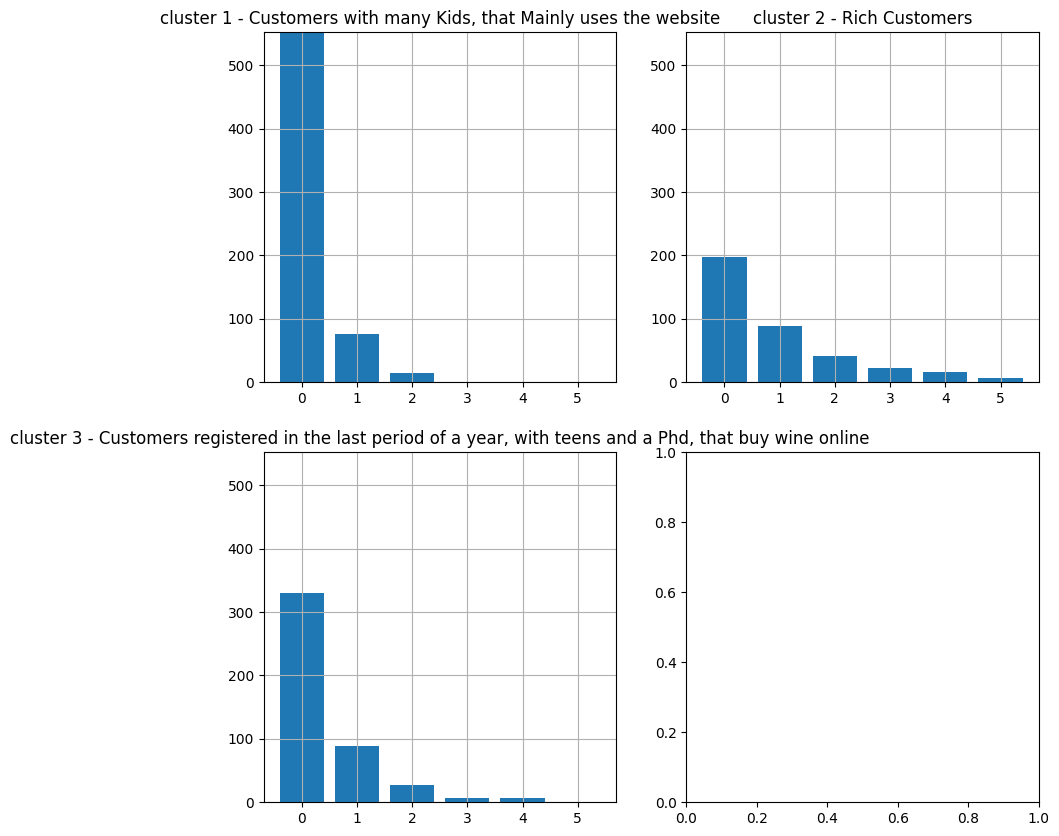

In [515]:
mask_cluster = [km_std.labels_ == ii for ii in range(best_k_std)]
cluster_complain = [dict(workdf.loc[mask_cluster[ii], 'Cmp'].value_counts()) for ii in range(best_k_std)]

bin_labels = [0, 1, 2, 3, 4, 5]
maxcount = np.max([max(cluster_complain[kk].values()) for kk in range(best_k_std)])

# MAKE the BARPLOT for THE CENTROIDS
fig_centroids_ext, ax_centroids_ext = plt.subplots(2, 2, figsize=(10,10))
for ii in range(best_k_std):
    ir = ii//2
    ic =  ii%2
    ax_centroids_ext[ir,ic].bar(bin_labels, [cluster_complain[ii].get(bb,0) for bb in bin_labels])
    ax_centroids_ext[ir,ic].set_ylim(0, maxcount)
    ax_centroids_ext[ir,ic].grid(visible=True, which='both')
    plt.tight_layout
    ax_centroids_ext[ir,ic].set_title(f'cluster {ii + 1} - {cluster_names_std[ii]}')

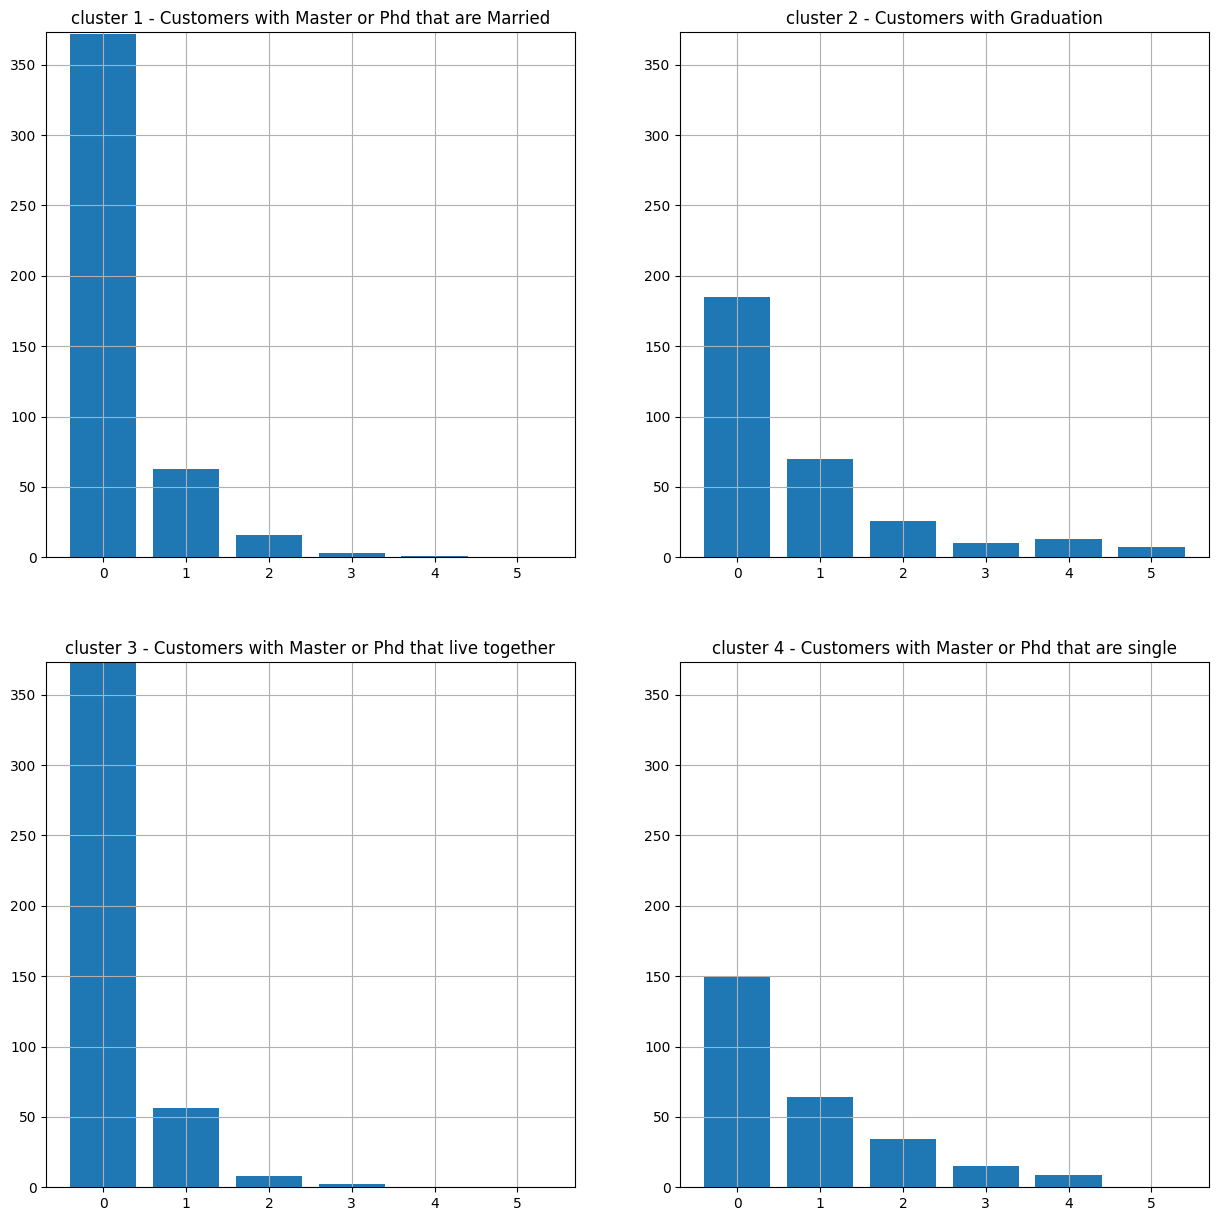

In [359]:
mask_cluster = [km_mm.labels_ == ii for ii in range(best_k_mm)]
cluster_complain = [dict(workdf.loc[mask_cluster[ii], 'Cmp'].value_counts()) for ii in range(best_k_mm)]

bin_labels = [0, 1, 2, 3, 4, 5]
maxcount = np.max([max(cluster_complain[kk].values()) for kk in range(best_k_mm)])

# MAKE the BARPLOT for THE CENTROIDS
fig_centroids_ext, ax_centroids_ext = plt.subplots(2, 2, figsize=(15,15))
for ii in range(best_k_mm):
    ir = ii//2
    ic =  ii%2
    ax_centroids_ext[ir,ic].bar(bin_labels, [cluster_complain[ii].get(bb,0) for bb in bin_labels])
    ax_centroids_ext[ir,ic].set_ylim(0, maxcount)
    ax_centroids_ext[ir,ic].grid(visible=True, which='both')
    plt.tight_layout
    ax_centroids_ext[ir,ic].set_title(f'cluster {ii + 1} - {cluster_names_mm[ii]}')

- Internal Evaluation

In [360]:
silscores = silhouette_samples(Y_Xworkdf_std[:,0:l_std], km_std.labels_)
cluster_silscores = [np.mean(np.array(silscores)[km_std.labels_ == kk]) for kk in range(best_k_std)]

display(pd.DataFrame(np.array(cluster_silscores + [np.max(silcoeff_list_std)]), index=cluster_names_std + ['Global'], columns=['Sil. Score']))

,Sil. Score
"Customers with many Kids, that Mainly uses the website",0.390883
Rich Customers,0.369066
"Customers registered in the last period of a year, with teens and a Phd, that buy wine online",0.263074
Global,0.347398
